# IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFECV

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_text

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# IMPORT DATA


In [ ]:
from google.colab import drive

drive.mount("/content/drive")

#df_original = **************

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = df_original.copy()
df.head()

,Timestamp,1.1 Name of the organization:\n(Optional),1.2 What is your organization's primary business model?,1.3 Customer Segment Focus,1.4 In which geographical region does your organization primarily operate?,1.5 Size of Organization - Approximately how many employees does your organization have?,1.6 Please select the annual revenue range of your organization for the last fiscal year:,1.7 Role/Position in the organization:,1.8 Years of experience in the financial services sector:,1.9 How many digital transformation initiatives have you been directly involved in (if any)?,...,6.5 Importance of Managing Interplay Between Initiatives\nHow strongly do you agree that the effective management of interactions between simultaneous digital transformation initiatives is critical to achieving your organization's strategic goals and improving operational efficiency?,7.1 Engagement Level with Digital Transformation Initiatives\nTo what extent do you agree that actively engaging in multiple digital transformation initiatives simultaneously is crucial for achieving your organization's strategic objectives and enhancing operational efficiency?,"7.2 Adoption, Impact and Effectiveness of Digital Maturity Models in Digital Transformation Initiatives\nTo what extent do you agree that the adoption and effective implementation of digital maturity models have significantly guided and improved your organization's digital transformation initiatives?","7.3 Essential Strategies for Implementing Effective Digital Transformation Initiatives\nPlease RANK the following areas in order of their perceived value in enabling successful digital transformation efforts within your organization, with 1 being the least critical and 5 being the extremely critical. [Strategic and Leadership Foundation]","7.3 Essential Strategies for Implementing Effective Digital Transformation Initiatives\nPlease RANK the following areas in order of their perceived value in enabling successful digital transformation efforts within your organization, with 1 being the least critical and 5 being the extremely critical. [Cultural Adaptation and Skill Development]","7.3 Essential Strategies for Implementing Effective Digital Transformation Initiatives\nPlease RANK the following areas in order of their perceived value in enabling successful digital transformation efforts within your organization, with 1 being the least critical and 5 being the extremely critical. [Technological Harmonization]","7.3 Essential Strategies for Implementing Effective Digital Transformation Initiatives\nPlease RANK the following areas in order of their perceived value in enabling successful digital transformation efforts within your organization, with 1 being the least critical and 5 being the extremely critical. [Regulatory Compliance and Enhanced Customer Experience]","7.3 Essential Strategies for Implementing Effective Digital Transformation Initiatives\nPlease RANK the following areas in order of their perceived value in enabling successful digital transformation efforts within your organization, with 1 being the least critical and 5 being the extremely critical. [Sustainable Growth and Value Realization]",7.4 Measuring Success and ROI of Digital Initiatives\nClear metrics and Key Performance Indicators (KPIs) are established to measure the success and Return on Investment (ROI) of our digital transformation initiatives.,7.5 Effectiveness of Program Management Practices\nProgram management practices are in place to ensure the seamless execution and integration of various digital projects within our organization.
0,2024-03-28 08:20:39.050,State Bank of India,Banking,Large Corporations,Asia Pacific (APAC),"Enterprise (More than 10,000 employees)",Over $5 billion,"Middle Management (Manager, Director)",11-20 years,6-10 initiatives,...,5,5,5,Rank5: Extremely Critical,Rank4: Very Critical,Rank3: Moderately Critical,Rank2: Slightly Critical,Rank1: Least Critical,5,5
1,2024-03-28 11:11:06.488,Citibank,Banking,Larg

# DATA CLEANING


In [ ]:
df.drop(["Timestamp", "1.1 Name of the organization:\n(Optional)"], axis = 1, inplace = True)
df.columns

Index(['1.2 What is your organization's primary business model?',
       '1.3 Customer Segment Focus',
       '1.4 In which geographical region does your organization primarily operate?',
       '1.5 Size of Organization - Approximately how many employees does your organization have?',
       '1.6 Please select the annual revenue range of your organization for the last fiscal year:',
       '1.7 Role/Position in the organization:',
       '1.8 Years of experience in the financial services sector:',
       '1.9 How many digital transformation initiatives have you been directly involved in (if any)?',
       '1.10 Gender',
       '2.1 Process Standardization and Automation Efficacy\nTo what extent do you agree that level of standardization and automation impact the execution and management of multiple concurrent digital transformation initiatives.',
       '2.2 Process Optimization\nTo what extent do you agree that addressing process inefficiencies, redundancies, and bottlenecks is criti

In [ ]:
df.columns = ['1.2_business_model', '1.3_customer_focus', '1.4_geographical_region', '1.5_co_size', '1.6_annual_revenue',\
    '1.7_role_position', '1.8_experience_years', '1.9_digital_initiatives', '1.10_gender', '2.1_process_standardization', '2.2_process_optimization',\
    '2.3_technology_integration', '2.4_process_agility', '2.5_data_driven_improvements', '3.1_system_integration', '3.2_tech_business_alignment',\
    '3.3_legacy_system_challenges', '3.4_tech_solutions_support', '3.5_tech_assets_tracking', '4.1_workforce_preparedness', '4.2_digital_skills',\
    '4.3_support_competency_development', '4.4_attitude_change_innovation', '4.5_management_approaches', '5.1_goals_innovation_growth',\
    '5.1_goals_customer_focus',  '5.1_goals_operational_excellence', '5.1_goals_compliance_risk', '5.1_goals_sustainability',\
    '5.2_transformation_drivers', '5.3_client_objective_alignment', '5.4_innovation_emphasis', '5.5_alignment_challenges', '6.1_emerging_tech_impact',\
    '6.2_tech_readiness', '6.3_goals_strategic_importance', '6.4_initiative_alignment', '6.5_interplay_management', '7.1_engagement_level',\
    '7.2_digital_maturity_adoption', '7.3_strategy_leadership', '7.3_strategy_cultural_adaptation', '7.3_strategy_tech_harmonization',\
    '7.3_strategy_compliance', '7.3_strategy_sustainable_growth', '7.4_roi_measurement', '7.5_program_management']


In [ ]:
for col in df.columns:
  print(df[col].unique())

['Banking' 'Capital Markets, Venture Capital, and Private Equity'
 'Fintech' 'Insurance' 'Audit, Assurance, Advisory, and Consulting'
 'Technology' 'Healthcare/Pharma' 'Hospitality' 'Business Software'
 'Media & Advertising' 'Manufacturing' 'Brokerage' 'IT Services'
 'AI, Data Analytics Consulting & Services' 'Payment Processor'
 'Publishing' 'Education' 'Sales and Service of Cash Processing Solutions'
 'Higher Education' 'Hitech'
 'Credit Ratings, Risk Management, Compliance ' 'HealthCare'
 'Social Enterprise ' 'Credit Rating Agency' 'Life Sciences '
 'Transportation' 'Government'
 'Insurance Regulatory and Development Authority of India' 'Logistics'
 'Ratings' 'Financial Data Anaytics and Ratings ' 'Media Agency'
 'Business Consulting' 'Food & Beverage'
 'Technology, Manufacturing, Rolling Stock, Transportation '
 'Consumer Goods' 'Delivery Services' 'Research and Development'
 'Healthcare Molecular Diagnostic ' 'EMS'
 'Asset management, Wealth management' 'Government/Non-profit' 'NG

In [ ]:
df.replace({'Rank1: Least Critical' : 1, 'Rank2: Slightly Critical' : 2, 'Rank3: Moderately Critical' : 3,
            'Rank4: Very Critical' : 4, 'Rank5: Extremely Critical' : 5,

            'Micro (1-10 employees)' : 1, 'Small (11-100 employees)' : 2, 'Large (1,001-10,000 employees)'  : 3,
            'Enterprise (More than 10,000 employees)' : 5, 'Medium (101-1,000 employees)' : 4,

            '0-2 years' : 1, '3-5 years' : 2, '6-10 years' : 3, '11-20 years' : 4, '21+ years' : 5,

            'Male' : 1, 'Female' : 2,

            'Other' : 0, 'Retail Consumers' : 1, 'Small and Medium Enterprises (SMEs)' : 2, 'Large Corporations' : 3,

            'Asia Pacific (APAC)' : 1, 'North America' : 2, 'Europe, Middle East & Africa (EMEA)' : 3, 'Latin America (LATAM)' : 4,

            'Less than $5 million' : 1, '$5 million to $50 million' : 2, '$50 million to $250 million' : 3, '$250 million to $5 billion' : 5,
            'Over $5 billion' : 6,

            'Middle Management (Manager, Director)' : 1, 'Executive (C-level, President, Vice President)' : 2, 'Professor' : 3,
            'Operational Management (Staff, Analyst, Lead)' : 4, 'Technology Specialist (Engineer, Analyst, Developer)' : 5,

            '1-2 initiatives' : 1, '3-5 initiatives' : 2, '6-10 initiatives' : 3, 'More than 10 initiatives'  : 4
            }, inplace = True)

In [ ]:
df.drop("1.2_business_model", axis = 1, inplace = True)

## IMPUTATION

In [ ]:
# imputing the null values using most frequent strategy
si = SimpleImputer(strategy = 'most_frequent')
df = pd.DataFrame(si.fit_transform(df), columns = df.columns)
df = df.astype(int)
df.info()
print(si.statistics_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   1.3_customer_focus                  511 non-null    int64
 1   1.4_geographical_region             511 non-null    int64
 2   1.5_co_size                         511 non-null    int64
 3   1.6_annual_revenue                  511 non-null    int64
 4   1.7_role_position                   511 non-null    int64
 5   1.8_experience_years                511 non-null    int64
 6   1.9_digital_initiatives             511 non-null    int64
 7   1.10_gender                         511 non-null    int64
 8   2.1_process_standardization         511 non-null    int64
 9   2.2_process_optimization            511 non-null    int64
 10  2.3_technology_integration          511 non-null    int64
 11  2.4_process_agility                 511 non-null    int64
 12  2.5_data

In [ ]:
demo = df[['1.3_customer_focus', '1.4_geographical_region', '1.6_annual_revenue', '1.7_role_position',
       '1.8_experience_years', '1.5_co_size', '1.10_gender']]

In [ ]:
demo.value_counts()

1.3_customer_focus  1.4_geographical_region  1.6_annual_revenue  1.7_role_position  1.8_experience_years  1.5_co_size  1.10_gender
3                   2                        6                   2                  5                     5            1              144
                    1                        6                   2                  5                     5            1               44
                    2                        6                   2                  5                     5            2               44
                    3                        6                   2                  5                     5            1               42
                    2                        6                   1                  4                     5            1               40
                                                                                                                                     ... 
                                         

# EXPLORATORY DATA ANALYSIS

In [ ]:
for col in demo.columns:
  print(demo[col].unique())

[3 1 2 0]
[1 2 3 4 0]
[6 5 1 2 3]
[1 2 3 4 5]
[4 5 3 1 2]
[5 3 1 4 2]
[1 2]


## Demographic visualisation

In [ ]:
demo.columns

Index(['1.3_customer_focus', '1.4_geographical_region', '1.6_annual_revenue',
       '1.7_role_position', '1.8_experience_years', '1.5_co_size',
       '1.10_gender'],
      dtype='object')

In [ ]:
demo['1.5_co_size'].value_counts()

1.5_co_size
5    410
3     84
4      8
1      5
2      4
Name: count, dtype: int64

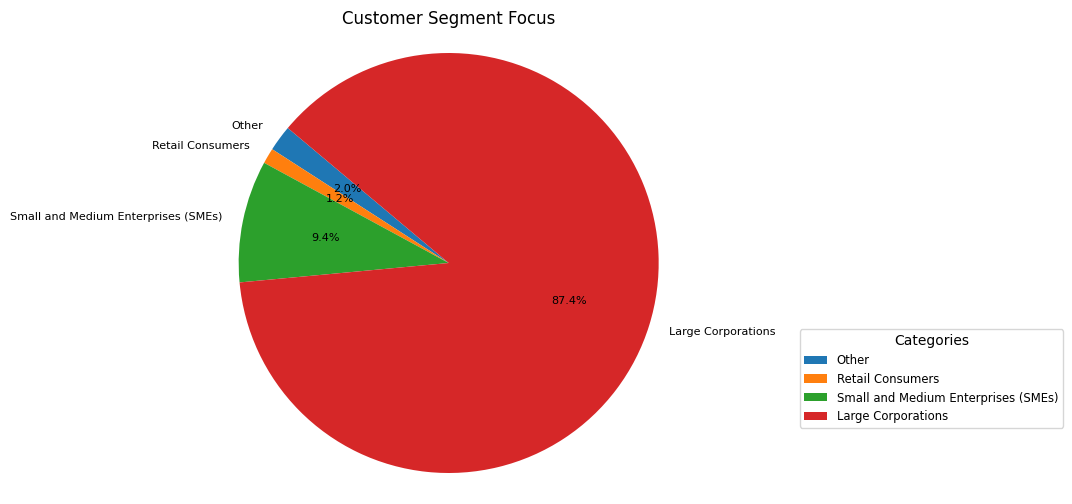

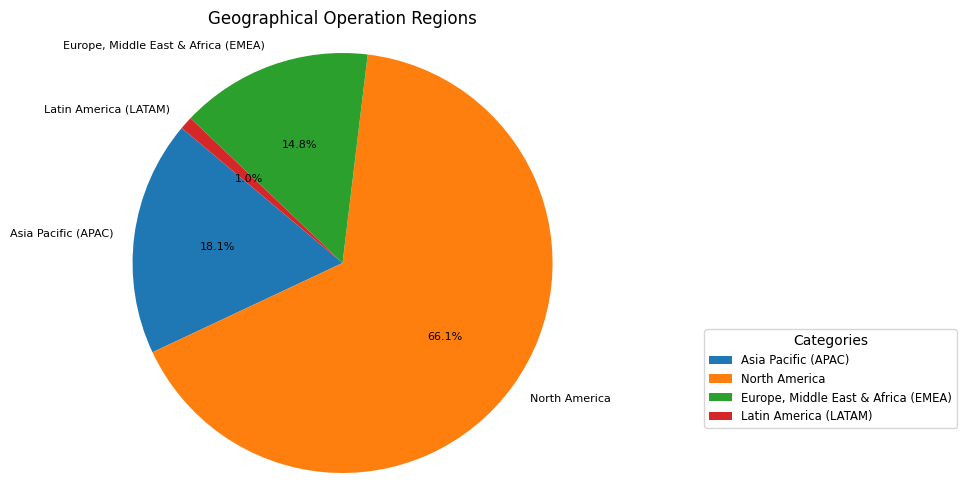

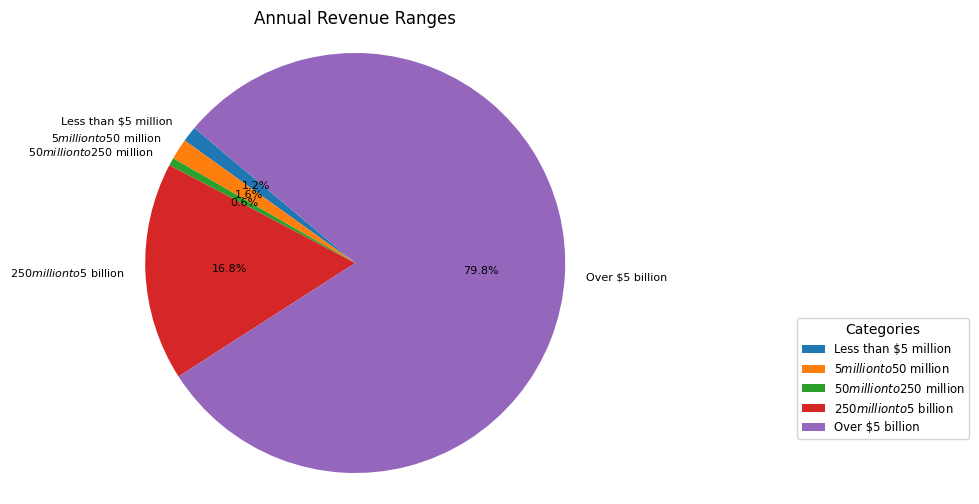

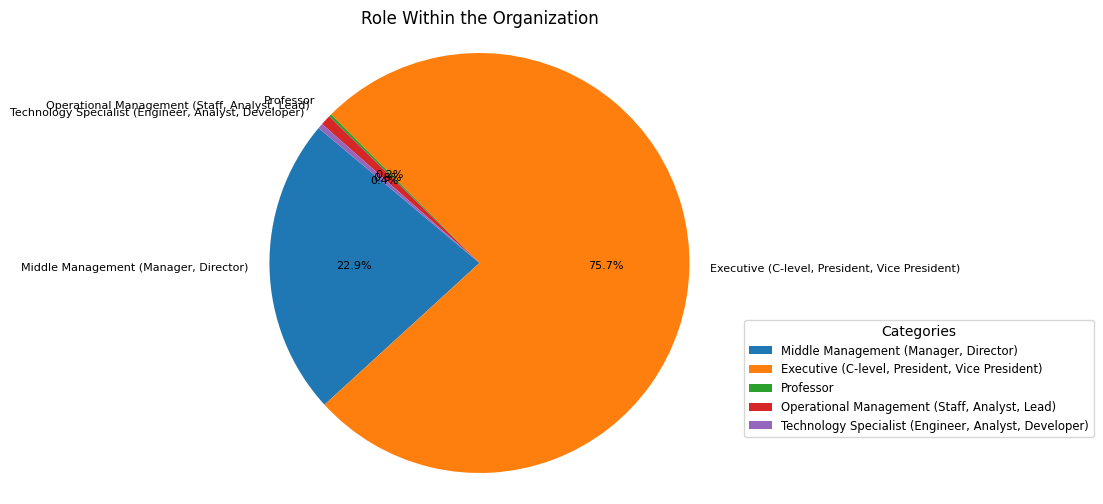

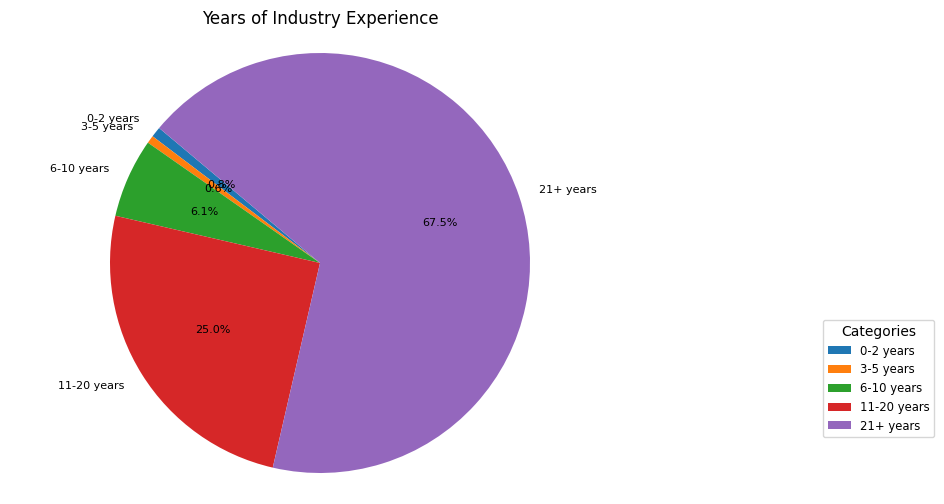

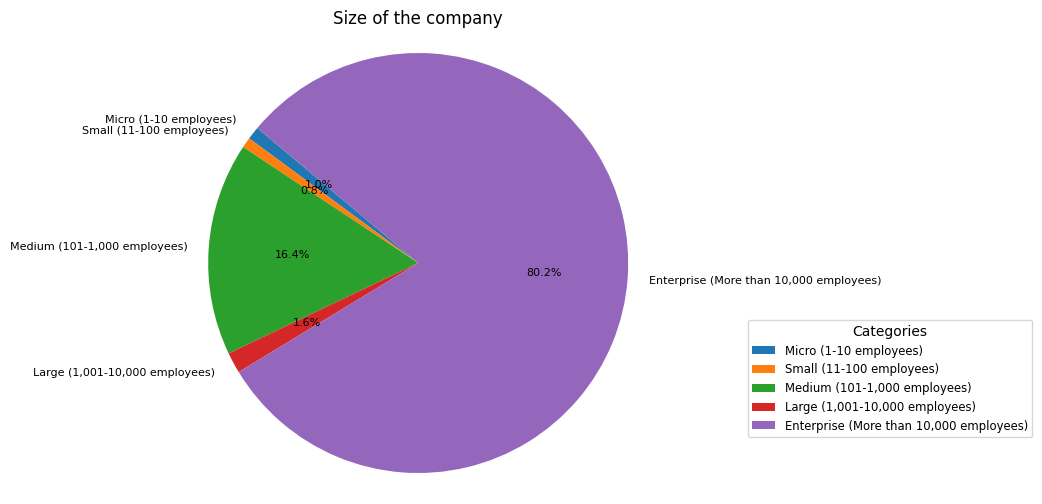

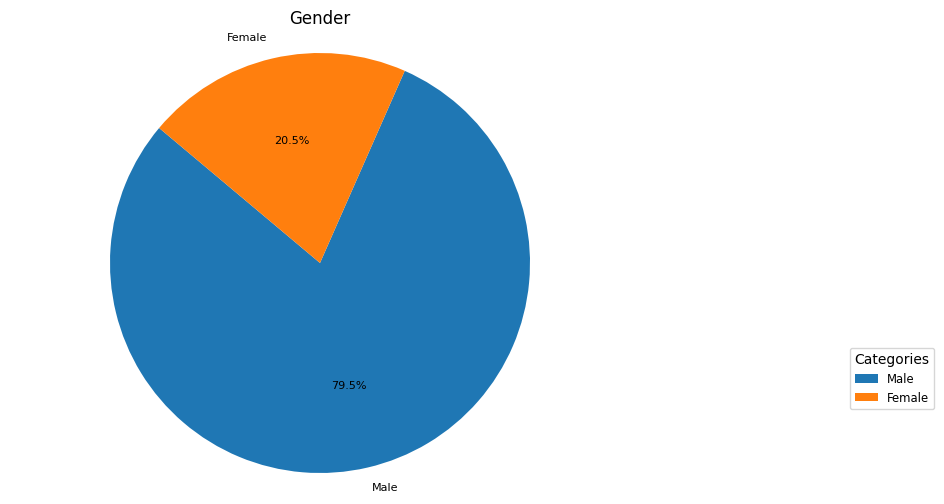

In [ ]:
import matplotlib.pyplot as plt

def plot_demo(demo: pd.core.frame.DataFrame, title_list: list, decode_dict: dict):
    count = 0
    for col in demo.columns:
        # Get full category list from decode_dict for the column, ensuring all categories are included
        full_categories = pd.Series(decode_dict[col])
        # Count the occurrences of each category in the column
        grouped_data = demo[col].value_counts().reindex(full_categories.index, fill_value=0)
        # Create a DataFrame with categories, counts, and percentages
        grouped_data = pd.DataFrame({
            'count': grouped_data,
            'percent': round((grouped_data / grouped_data.sum()) * 100, 1),
            'label': full_categories
        }).reset_index(drop=True)

        # Create pie chart
        plt.figure(figsize=(8, 6))
        wedges, texts, autotexts = plt.pie(grouped_data['percent'], labels=grouped_data['label'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8})

        # Style adjustments
        for text, autotext in zip(texts, autotexts):
            if grouped_data.loc[texts.index(text), 'count'] == 0:
                text.set_alpha(0.5)  # Dim label for zero counts
                autotext.set_alpha(0.5)  # Dim percentage for zero counts

        plt.title(title_list[count])
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

        # Add legend
        plt.legend(title="Categories", labels=grouped_data['label'], loc="right", bbox_to_anchor=(1.5, 0.25), fontsize='small', fancybox=True)

        # Show plot
        plt.show()

        count += 1

        pass

title_list = ["Customer Segment Focus", "Geographical Operation Regions", "Annual Revenue Ranges",\
              "Role Within the Organization", "Years of Industry Experience", "Size of the company", "Gender"]

decode_dict = {'1.3_customer_focus' :
                {0 : 'Other',
                 1 : 'Retail Consumers',
                 2 : 'Small and Medium Enterprises (SMEs)',
                 3 : 'Large Corporations'},

               '1.4_geographical_region' :
                {1 : 'Asia Pacific (APAC)',
                 2 : 'North America',
                 3 : 'Europe, Middle East & Africa (EMEA)',
                 4 :'Latin America (LATAM)'},

               '1.6_annual_revenue' :
                {1 : 'Less than $5 million',
                 2 : '$5 million to $50 million',
                 3 : '$50 million to $250 million',
                 5 : '$250 million to $5 billion',
                 6 : 'Over $5 billion'},

               '1.7_role_position' :
                {1 : 'Middle Management (Manager, Director)',
                 2 : 'Executive (C-level, President, Vice President)',
                 3 : 'Professor',
                 4 : 'Operational Management (Staff, Analyst, Lead)',
                 5 : 'Technology Specialist (Engineer, Analyst, Developer)'},

               '1.8_experience_years' :
                {1 : '0-2 years',
                 2 : '3-5 years',
                 3 : '6-10 years',
                 4 : '11-20 years',
                 5 : '21+ years'},

               '1.5_co_size' :
                {1 : 'Micro (1-10 employees)',
                 2 : 'Small (11-100 employees)',
                 3 : 'Medium (101-1,000 employees)',
                 4 : 'Large (1,001-10,000 employees)',
                 5 : 'Enterprise (More than 10,000 employees)'
                 },

               '1.10_gender' :
                {1 : 'Male',
                 2 : 'Female'}
               }

plot_demo(demo, title_list, decode_dict)


### INTERPRETATION

Customer Segment Focus

Large Corporations: 87.4%

The majority of respondents are from large corporations, indicating a significant focus on larger enterprises.

Small and Medium Enterprises (SMEs): 9.4%

A smaller proportion of respondents represent SMEs.

Retail Consumers: 1.2%

Very few respondents are retail consumers.

Other: 2.0%

A minor segment falls into the 'Other' category.

2. Geographical Operation Regions

North America: 66.1%

The largest segment of respondents operates in North America.

Asia Pacific (APAC): 18.1%

A significant portion of respondents operates in the APAC region.

Europe, Middle East & Africa (EMEA): 14.8%

Respondents from the EMEA region make up a smaller proportion.

Latin America (LATAM): 1.0%

Very few respondents operate in the LATAM region.

3. Annual Revenue Ranges

Over $5 billion: 79.8%

The vast majority of respondents represent organizations with annual revenues over $5 billion.

$250 million to $5 billion: 16.8%

A smaller segment falls within this revenue range.

$50 million to $250 million: 1.6%

Very few respondents are in this revenue range.

$5 million to $50 million: 1.2%

A negligible proportion of respondents are in this range.

Less than $5 million: 0.6%

Almost no respondents are from organizations with annual revenues less than $5 million.

4. Role Within the Organization

Executive (C-level, President, Vice President): 75.7%

Most respondents hold executive-level positions.

Middle Management (Manager, Director): 22.9%

A significant portion of respondents are in middle management.

Operational Management (Staff, Analyst, Lead): 0.6%

Very few respondents are in operational management roles.

Technology Specialist (Engineer, Analyst, Developer): 0.6%

Similar to operational management, very few respondents are technology specialists.

Professor: 0.2%

An extremely small portion of respondents are professors.

5. Years of Industry Experience

21+ years: 67.5%

The majority of respondents have over 21 years of industry experience.

11-20 years: 25.0%

A significant portion has 11-20 years of experience.

6-10 years: 6.1%

Few respondents have 6-10 years of experience.

3-5 years: 0.8%

Very few respondents have 3-5 years of experience.

0-2 years: 0.6%

The smallest group has 0-2 years of industry experience.

6.  Size of the Company

This pie chart represents the distribution of respondents based on the size of the company they work for. The categories are defined as follows:

1. Micro (1-10 employees): 0.8%
2. Small (11-100 employees): 1.6%
3. Medium (101-1,000 employees): 16.4%
4. Large (1,001-10,000 employees): 80.2%
5. Enterprise (More than 10,000 employees): 1.0%

Key Observations:

The majority of respondents (80.2%) are from large companies with 1,001 to 10,000 employees.

Medium-sized companies (101-1,000 employees) represent 16.4% of the respondents.

Very few respondents come from micro (0.8%) and small (1.6%) companies.

Enterprise-level organizations with more than 10,000 employees account for only 1.0% of the responses.


Gender:

This pie chart represents the gender distribution of the respondents:

1. Male: 79.5%
2. Female: 20.5%

Key Observations:

The majority of respondents are male, making up 79.5% of the total.

Female respondents constitute 20.5% of the total.

---
---
Summary

The demographic details of the survey respondents reveal the following key insights:

Customer Segment:

The survey primarily targets large corporations (87.4%) with a minor representation from SMEs, retail consumers, and others.

Geographical Focus:

The majority of operations are concentrated in North America (66.1%), followed by APAC (18.1%) and EMEA (14.8%), with minimal presence in LATAM.

Annual Revenue:

Most respondents are from organizations with annual revenues over $5 billion (79.8%), indicating that the survey targets high-revenue companies.

Organizational Roles:

A significant number of respondents hold executive positions (75.7%), with middle management making up a smaller portion (22.9%).

Industry Experience:

The majority of respondents have extensive industry experience, with 67.5% having over 21 years and 25.0% having 11-20 years.

These insights suggest that the survey results are predominantly shaped by high-ranking executives from large, high-revenue corporations, primarily operating in North America, and possessing extensive industry experience. This demographic profile provides context for interpreting the survey findings and understanding the perspectives represented in the responses.

Company Size:

The large representation from big companies provides a robust dataset to analyze common trends and practices in digital transformation within resource-rich environments.

Having a large proportion of respondents from large companies (80.2%) ensures that the survey captures a wide array of digital transformation initiatives typically undertaken by well-resourced organizations. These companies are likely to have more extensive digital transformation projects and thus provide valuable insights.

The inclusion of respondents from medium-sized companies (16.4%) adds diversity to the dataset, providing a more rounded view of how different-sized organizations approach digital transformation.

Gender:

The varied perspectives from different genders contribute to a more nuanced understanding of the human factors influencing digital transformation.

The gender distribution, with 20.5% female and 79.5% male respondents, allows the research to include diverse viewpoints. This can lead to a more comprehensive understanding of how gender dynamics influence digital transformation initiatives.

While the majority of respondents are male, the presence of female respondents ensures that the insights are not entirely skewed and that female perspectives on digital transformation are also considered.

The disparity in gender representation can shed light on the gender dynamics within the financial sector, particularly regarding leadership roles in digital transformation projects.

It can also help identify any gender-specific challenges or opportunities in implementing digital transformation initiatives.

## SEPERATING THE DATA FRAMES


In [ ]:
sec2 = df[['1.9_digital_initiatives', '2.1_process_standardization', '2.2_process_optimization',
       '2.3_technology_integration', '2.4_process_agility',
       '2.5_data_driven_improvements']]

sec3 = df[['1.9_digital_initiatives', '3.1_system_integration',
       '3.2_tech_business_alignment', '3.3_legacy_system_challenges',
       '3.4_tech_solutions_support', '3.5_tech_assets_tracking']]

sec4 = df[['1.9_digital_initiatives', '4.1_workforce_preparedness', '4.2_digital_skills',
       '4.3_support_competency_development', '4.4_attitude_change_innovation',
       '4.5_management_approaches']]

sec5 = df[['1.9_digital_initiatives', '5.1_goals_innovation_growth',
       '5.1_goals_customer_focus', '5.1_goals_operational_excellence',
       '5.1_goals_compliance_risk', '5.1_goals_sustainability',
       '5.2_transformation_drivers', '5.3_client_objective_alignment',
       '5.4_innovation_emphasis', '5.5_alignment_challenges']]

sec6 = df[['1.9_digital_initiatives', '6.1_emerging_tech_impact', '6.2_tech_readiness',
       '6.3_goals_strategic_importance', '6.4_initiative_alignment',
       '6.5_interplay_management']]


sec7 = df[['1.9_digital_initiatives', '7.1_engagement_level',
       '7.2_digital_maturity_adoption', '7.3_strategy_leadership',
       '7.3_strategy_cultural_adaptation', '7.3_strategy_tech_harmonization',
       '7.3_strategy_compliance', '7.3_strategy_sustainable_growth',
       '7.4_roi_measurement', '7.5_program_management']]

In [ ]:
import pandas as pd

def add_mean_column(df):
    # Calculate the mean of each row and create a new column 'row_mean'
    df['mean'] = round(df.mean(axis=1), ndigits = 2)
    return df

add_mean_column(sec2);
add_mean_column(sec3);
add_mean_column(sec4);
add_mean_column(sec5);
add_mean_column(sec6);
add_mean_column(sec7);

<ipython-input-17-f65b903df05e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = round(df.mean(axis=1), ndigits = 2)
<ipython-input-17-f65b903df05e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = round(df.mean(axis=1), ndigits = 2)
<ipython-input-17-f65b903df05e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

## Pairplot

In [ ]:
final_df = pd.concat([sec2['1.9_digital_initiatives'],sec2['mean'], sec3['mean'], sec4['mean'], sec5['mean'], sec6['mean'], sec7['mean']], axis = 1)
final_df.columns = ['digital_initiatives', 'Business Prcess Opinion', 'Technology Intergration and alignment', 'Workforce', 'Strategic Perspectives',\
                    'Industry Trends Impact', 'Assessing Digital Transformation Journey']
final_df.head()

,digital_initiatives,Business Prcess Opinion,Technology Intergration and alignment,Workforce,Strategic Perspectives,Industry Trends Impact,Assessing Digital Transformation Journey
0,3,4.67,4.67,4.67,3.5,4.50,3.8
1,4,3.33,3.50,4.17,3.9,4.00,3.2
2,4,4.00,3.67,4.17,3.6,4.50,3.2
3,4,3.33,3.67,3.50,3.9,4.50,3.2
4,2,4.50,4.50,4.50,3.4,4.33,3.6


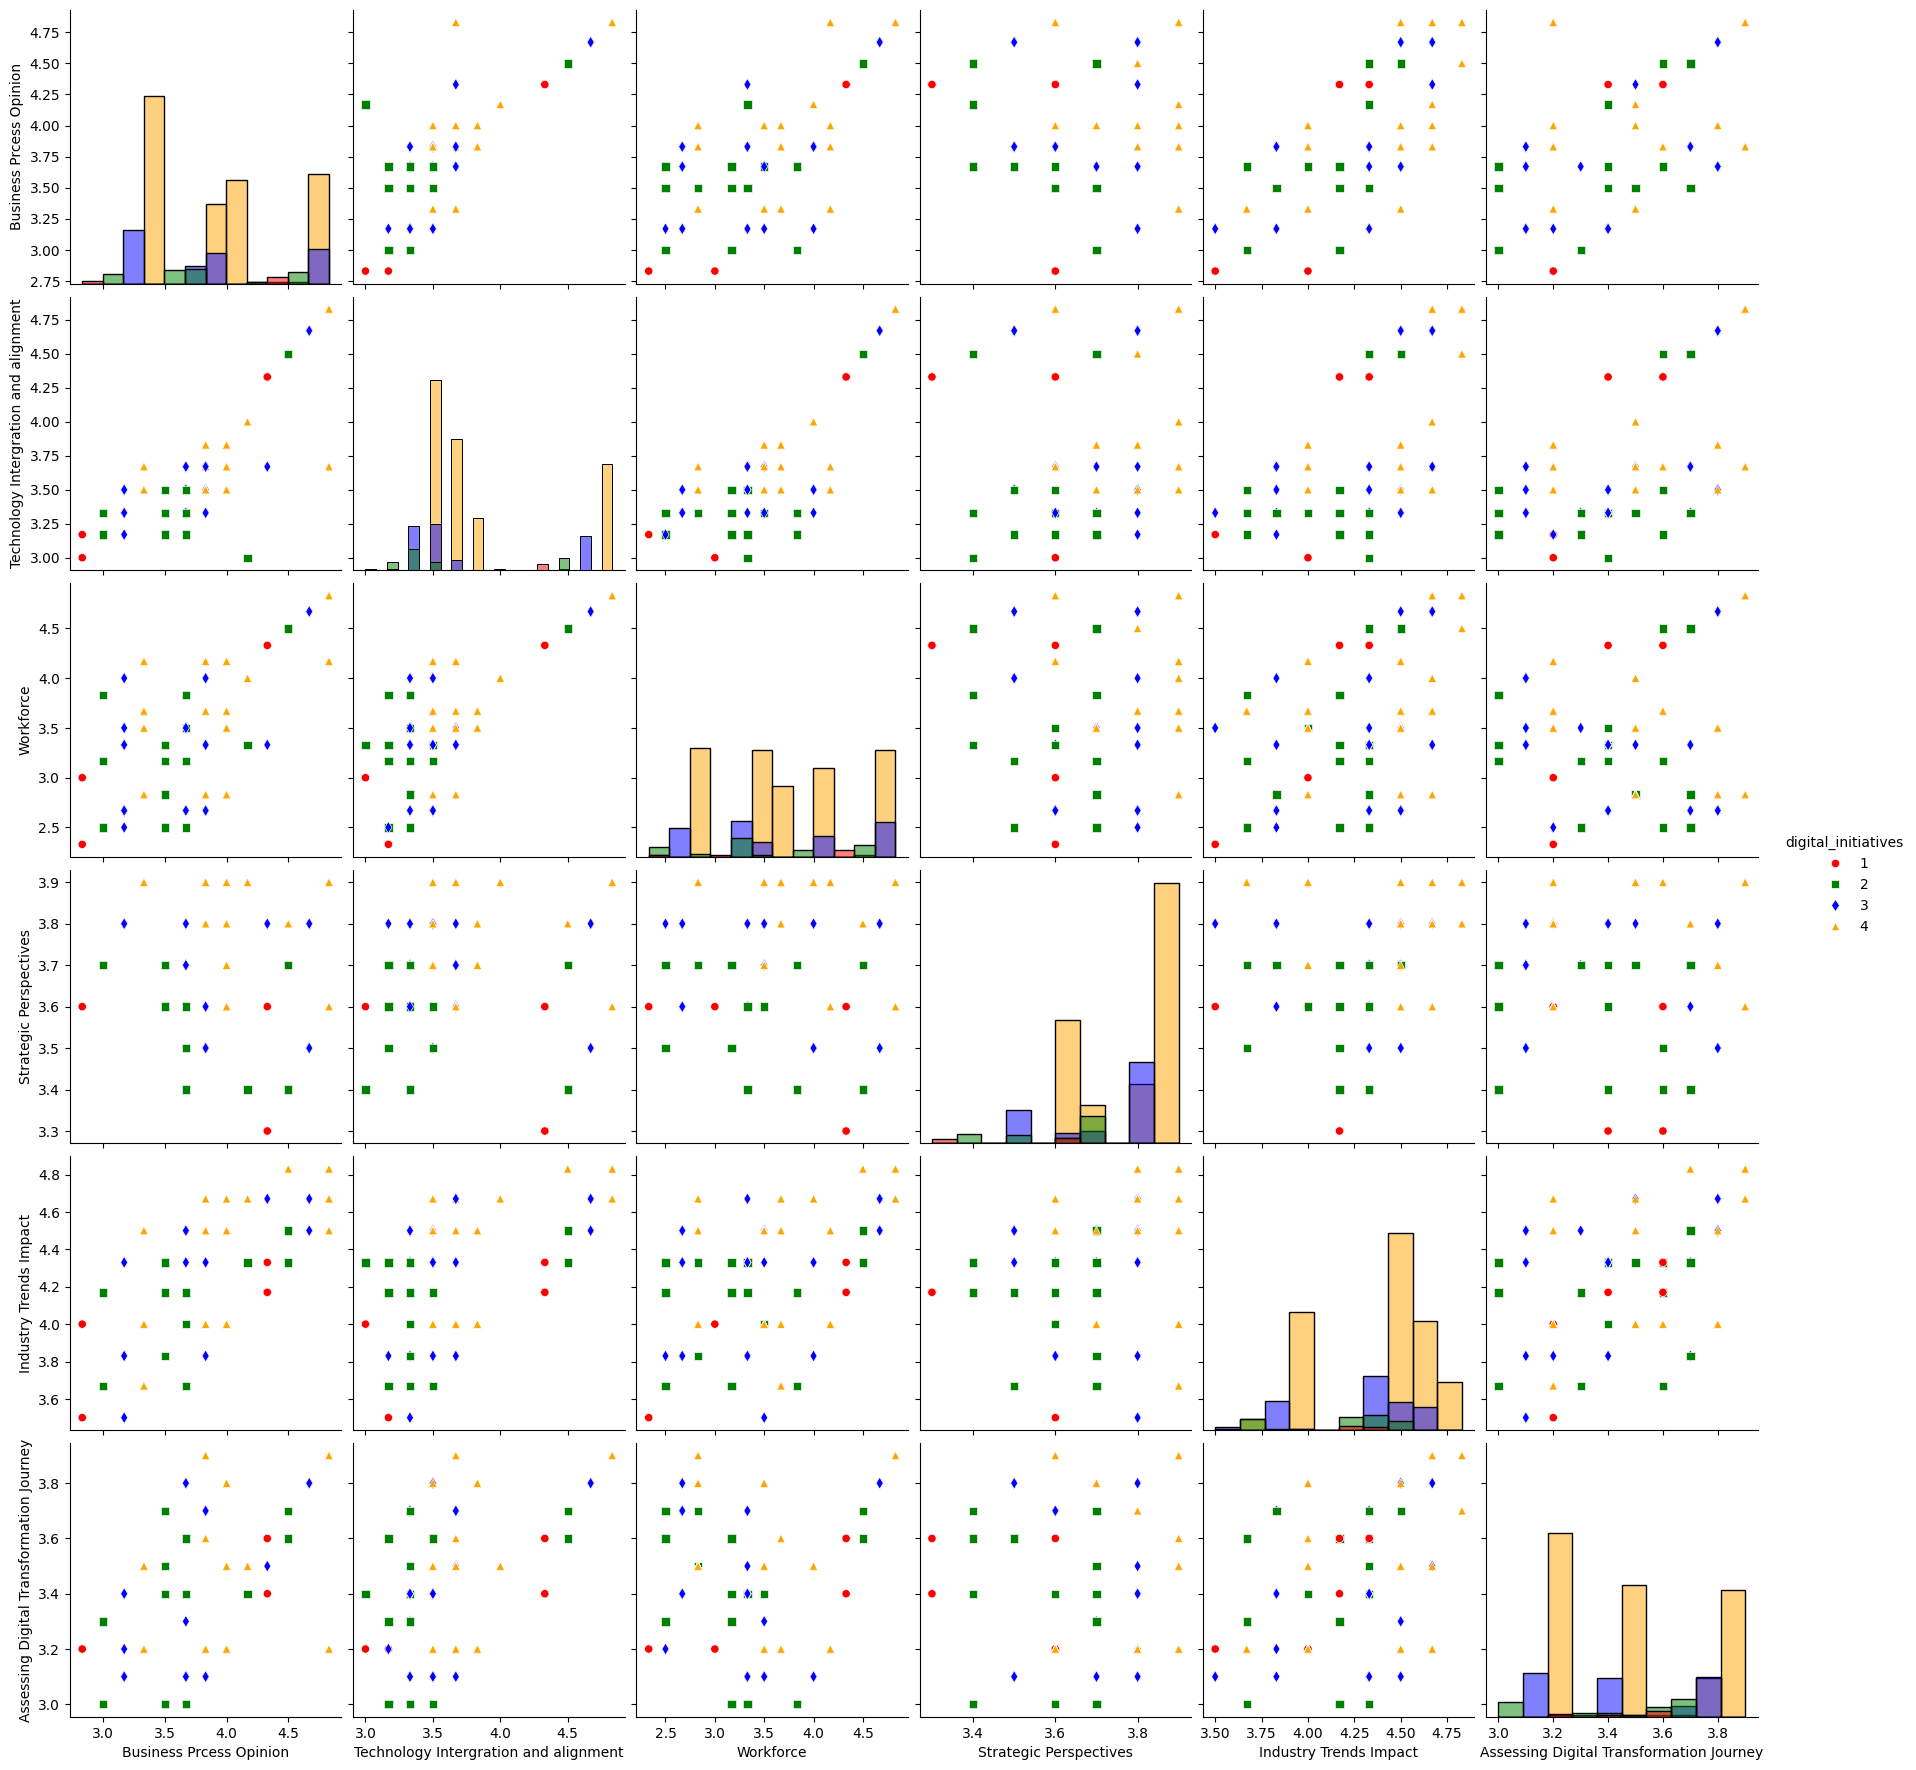

In [ ]:
sns.pairplot(final_df,height = 3, hue="digital_initiatives", diag_kind="hist", markers=["o", "s", "d", "^"],
             palette={1 : 'red', 2 : 'green', 3 : 'blue', 4 : 'orange'}) # hue is the variable in "data" to map plot aspects to different colours.


### Interpretation

The provided pairplot visualizes the relationships between several metrics assessing different aspects of multiple concurrent Digital Transformation Initiatives (DTIs) in the Financial Services sector. The hue represents the number of digital transformation initiatives taken by the organizations, coded as:

1: Red

2: Blue

3: Green

4: Orange

---
The metrics assessed are:

Business Process Opinion: Assesses how well business processes are aligned with carrying out multiple concurrent digital transformations within the financial sector.

Technology Integration and Alignment: Addresses how well technology supports multiple concurrent digital transformations within the financial sector.

Workforce: Assesses the preparedness of the workforce for multiple concurrent digital transformations within the financial sector.

Strategic Perspectives: Evaluates the strategic perspectives shaping digital transformation efforts within the organization, considering customer needs, technological advancements, and market dynamics. It also examines the alignment between client objectives and the organization's digital transformations.

Industry Trends Impact: Addresses the extent to which innovation and technological advancements impact digital transformations within organizations.

Assessing Digital Transformation Journey: Evaluates how active engagement and adoption of digital transformation within the organization help frame the digital transformations within the organization.

---
Analysis of the Pairplot

**Diagonal Plots (Histograms):**

These show the distribution of each metric.

Business Process Opinion: Organizations with more DTIs (orange and green) tend to rate their business processes alignment higher.

Technology Integration and Alignment: Higher values are more common for organizations with more DTIs, indicating better technology alignment.

Workforce: Organizations with more DTIs tend to rate their workforce preparedness higher.

Strategic Perspectives: Higher ratings in strategic perspectives for organizations with more DTIs suggest better alignment with customer needs, technological advancements, and market dynamics.

Industry Trends Impact: Organizations with more DTIs are more likely to be positively influenced by industry trends.

Assessing Digital Transformation Journey: Higher ratings in assessing the digital transformation journey are seen for organizations with more DTIs, indicating better engagement and adoption.

**Off-Diagonal Plots (Scatter Plots):**

These show the pairwise relationships between the metrics.

Business Process Opinion vs. Other Metrics:

Positive correlations with Technology Integration and Alignment, Workforce, Strategic Perspectives, Industry Trends Impact, and Assessing Digital Transformation Journey. Organizations with more DTIs (orange and green) tend to have higher values across these metrics.

Technology Integration and Alignment vs. Other Metrics:

Positive correlations suggest that better technology alignment supports higher ratings in other metrics.

Workforce vs. Other Metrics:

Positive correlations indicate that a well-prepared workforce is associated with better outcomes in other areas.

Strategic Perspectives vs. Other Metrics:

Positive correlations highlight that strategic perspectives shaped by customer needs, technological advancements, and market dynamics are aligned with higher ratings in other metrics.

Industry Trends Impact vs. Other Metrics:

Organizations that are more influenced by industry trends tend to rate higher in other metrics.

Assessing Digital Transformation Journey vs. Other Metrics:

Positive relationships with other metrics suggest that active engagement and adoption of digital transformations lead to better overall performance.

---
---
Final Summary and Industry Impact

The pairplot reveals several key insights:

Positive Correlations:

Strong positive correlations exist between the various metrics assessing digital transformation initiatives. Organizations that rate highly in one area tend to rate highly across all areas.
Impact of Multiple DTIs:

Organizations with more digital transformation initiatives (DTIs) tend to have higher ratings across all metrics. This indicates that a comprehensive approach to digital transformation correlates with better alignment of business processes, technology, workforce preparedness, strategic perspectives, and overall engagement in digital transformation journeys.

---
Strategic Implications:

The positive relationships suggest that organizations investing in multiple concurrent DTIs are likely to see improvements in several key areas. Better alignment of business processes and technology, a more prepared workforce, strategic perspectives that are well-aligned with customer needs and market dynamics, and active engagement in digital transformations contribute to this success.
Industry Impact

---
Competitiveness:

Organizations with comprehensive digital transformation efforts gain a competitive edge. They can better adapt to industry trends, improve strategic decision-making, and streamline business processes, leading to enhanced performance.

---
Adoption of Best Practices:

Insights from the pairplot suggest that adopting multiple DTIs is a best practice within the industry. This leads to better alignment with technological advancements and market dynamics, fostering innovation and efficiency.

---
Investment in Digital Transformation:

The financial services sector benefits from increased investment in digital transformation initiatives. Positive outcomes associated with multiple DTIs encourage other organizations to adopt similar strategies, promoting overall industry growth and modernization.


In conclusion, the pairplot demonstrates that multiple concurrent digital transformation initiatives have a holistic positive impact on various aspects of organizational performance in the financial services sector. This insight guides industry leaders in making informed decisions about investing in and prioritizing digital transformation efforts, ultimately enhancing competitiveness and fostering innovation in the industry.

### Section 2 distribution

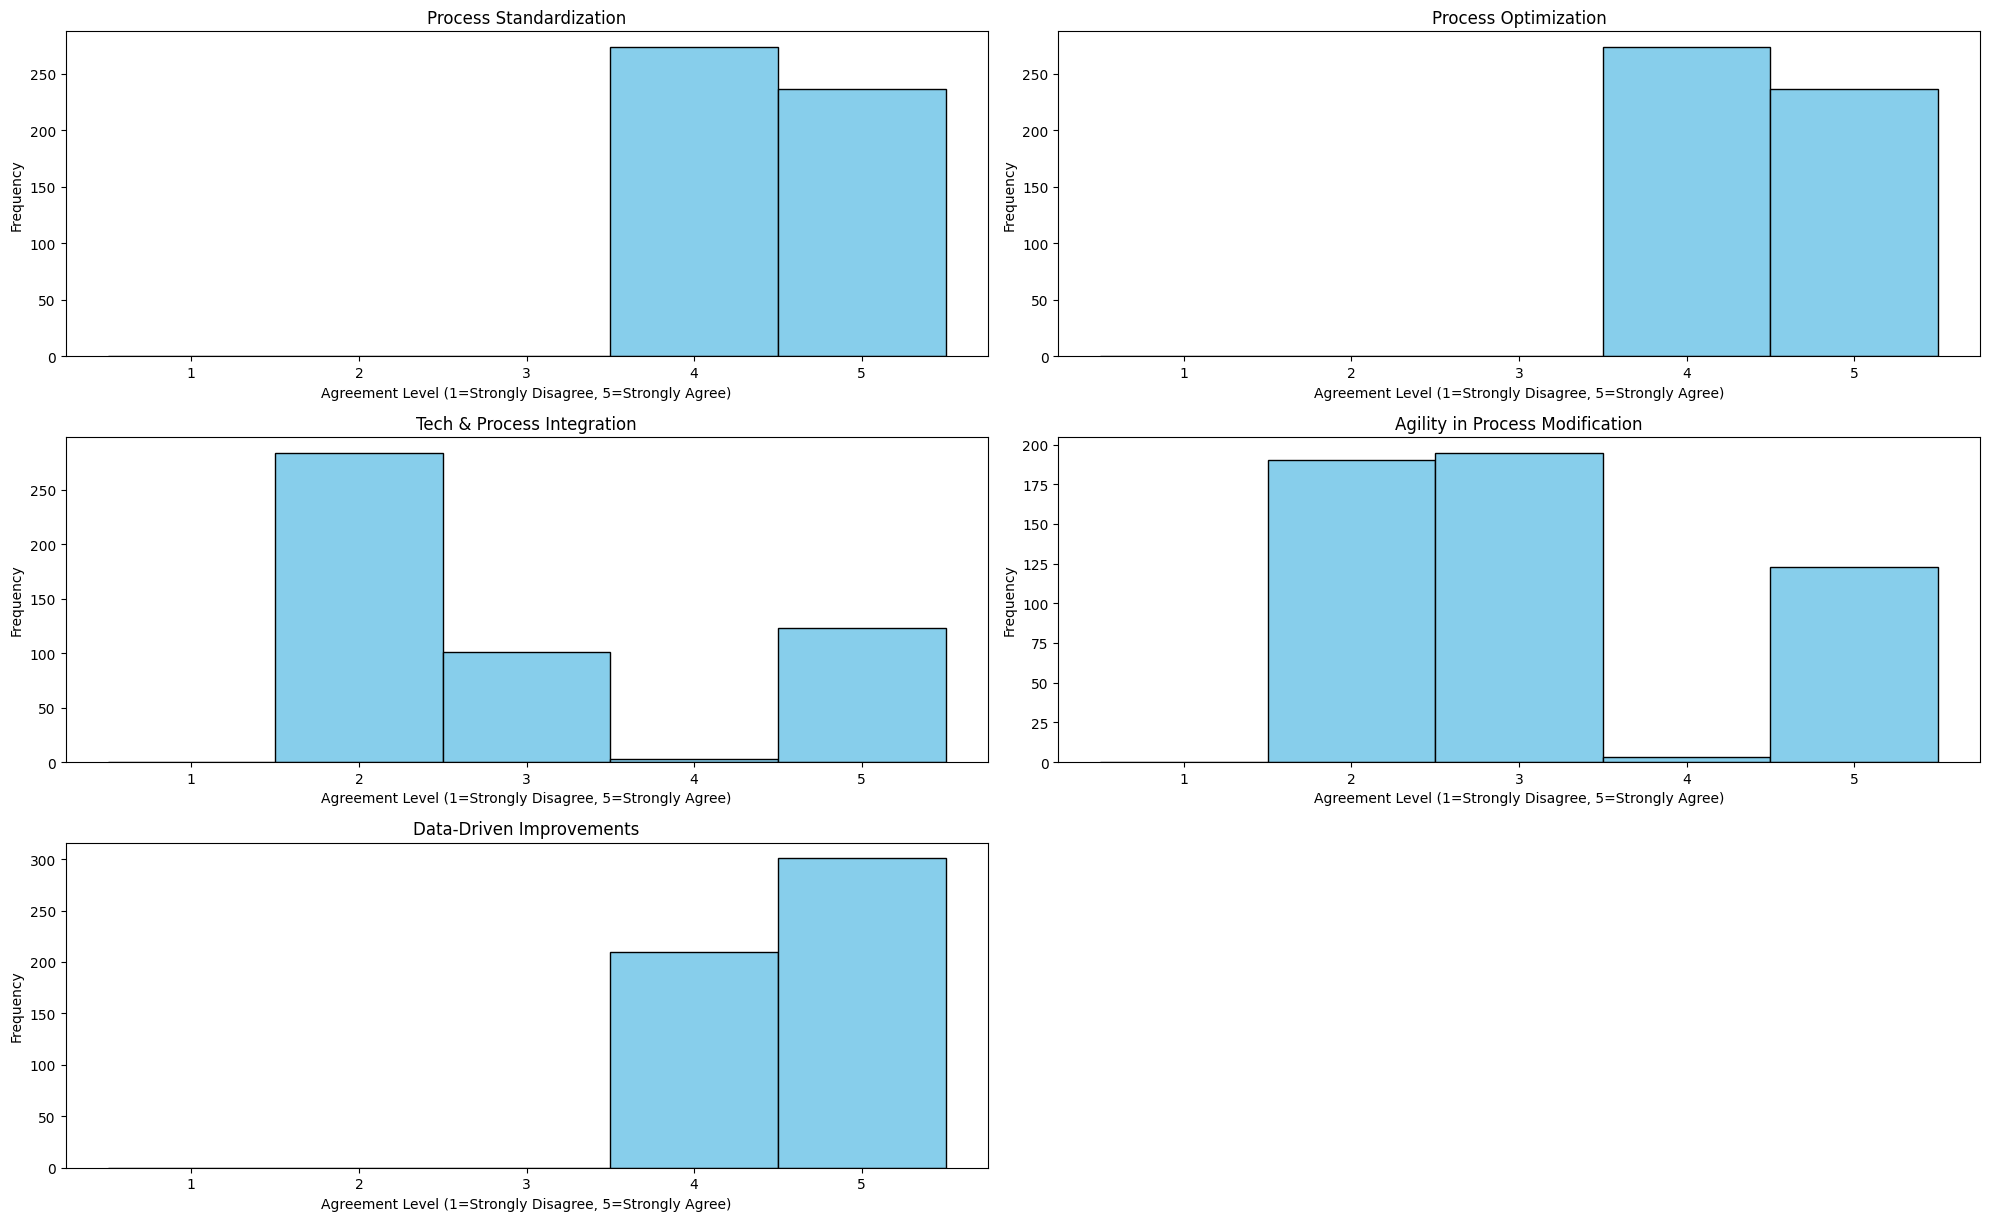

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '2.1_process_standardization': 'Process Standardization',
    '2.2_process_optimization': 'Process Optimization',
    '2.3_technology_integration': 'Tech & Process Integration',
    '2.4_process_agility': 'Agility in Process Modification',
    '2.5_data_driven_improvements': 'Data-Driven Improvements'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec2[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

Process Standardization:

This histogram indicates that respondents generally agree (Level 4 and 5) with the statement regarding process standardization, with the majority falling in Level 4. This suggests a positive reception towards standardizing processes within the organization, which can lead to more consistent and predictable outcomes.

Process Optimization:

The majority of responses are positive (Level 4) about process optimization, with a significant number also in Level 3, showing a moderate agreement. This indicates that while there is strong support for optimizing processes, there may be some reservations or perceived challenges in fully implementing these optimizations.

Tech & Process Integration:

Here, the highest frequency of responses is at Level 2, indicating a disagreement with effective integration of technology and processes. This suggests challenges or dissatisfaction with how technology is being integrated into business processes, possibly indicating issues with system compatibility, user training, or the alignment of tech solutions with business needs.

Agility in Process Modification:

Responses show a bimodal distribution with peaks at Level 3 and 4. This suggests a generally positive but cautious perception towards agility in modifying processes. It indicates that while there is some readiness to adapt processes quickly, there might be factors like risk, complexity, or resource constraints affecting full agreement.

Data-Driven Improvements:

A large number of respondents agree (Level 4 and 5) that data-driven improvements are beneficial, with the peak at Level 4. This reflects a strong endorsement of using data analytics to enhance process efficiency and outcomes, aligning with current trends in business towards data-driven decision making.

---
---
Summary:

Overall, the histograms suggest that while there is strong agreement on the benefits of process standardization, optimization, and data-driven improvements, there are significant challenges and some disagreement regarding the integration of technology into processes and the agility in modifying processes. These insights could be crucial for organizations looking to enhance their operational strategies through technology and data analytics. Addressing the concerns in tech integration and enhancing agility in process modifications may be key areas for development to fully realize the potential benefits of these strategies.


### Section 3 distribution

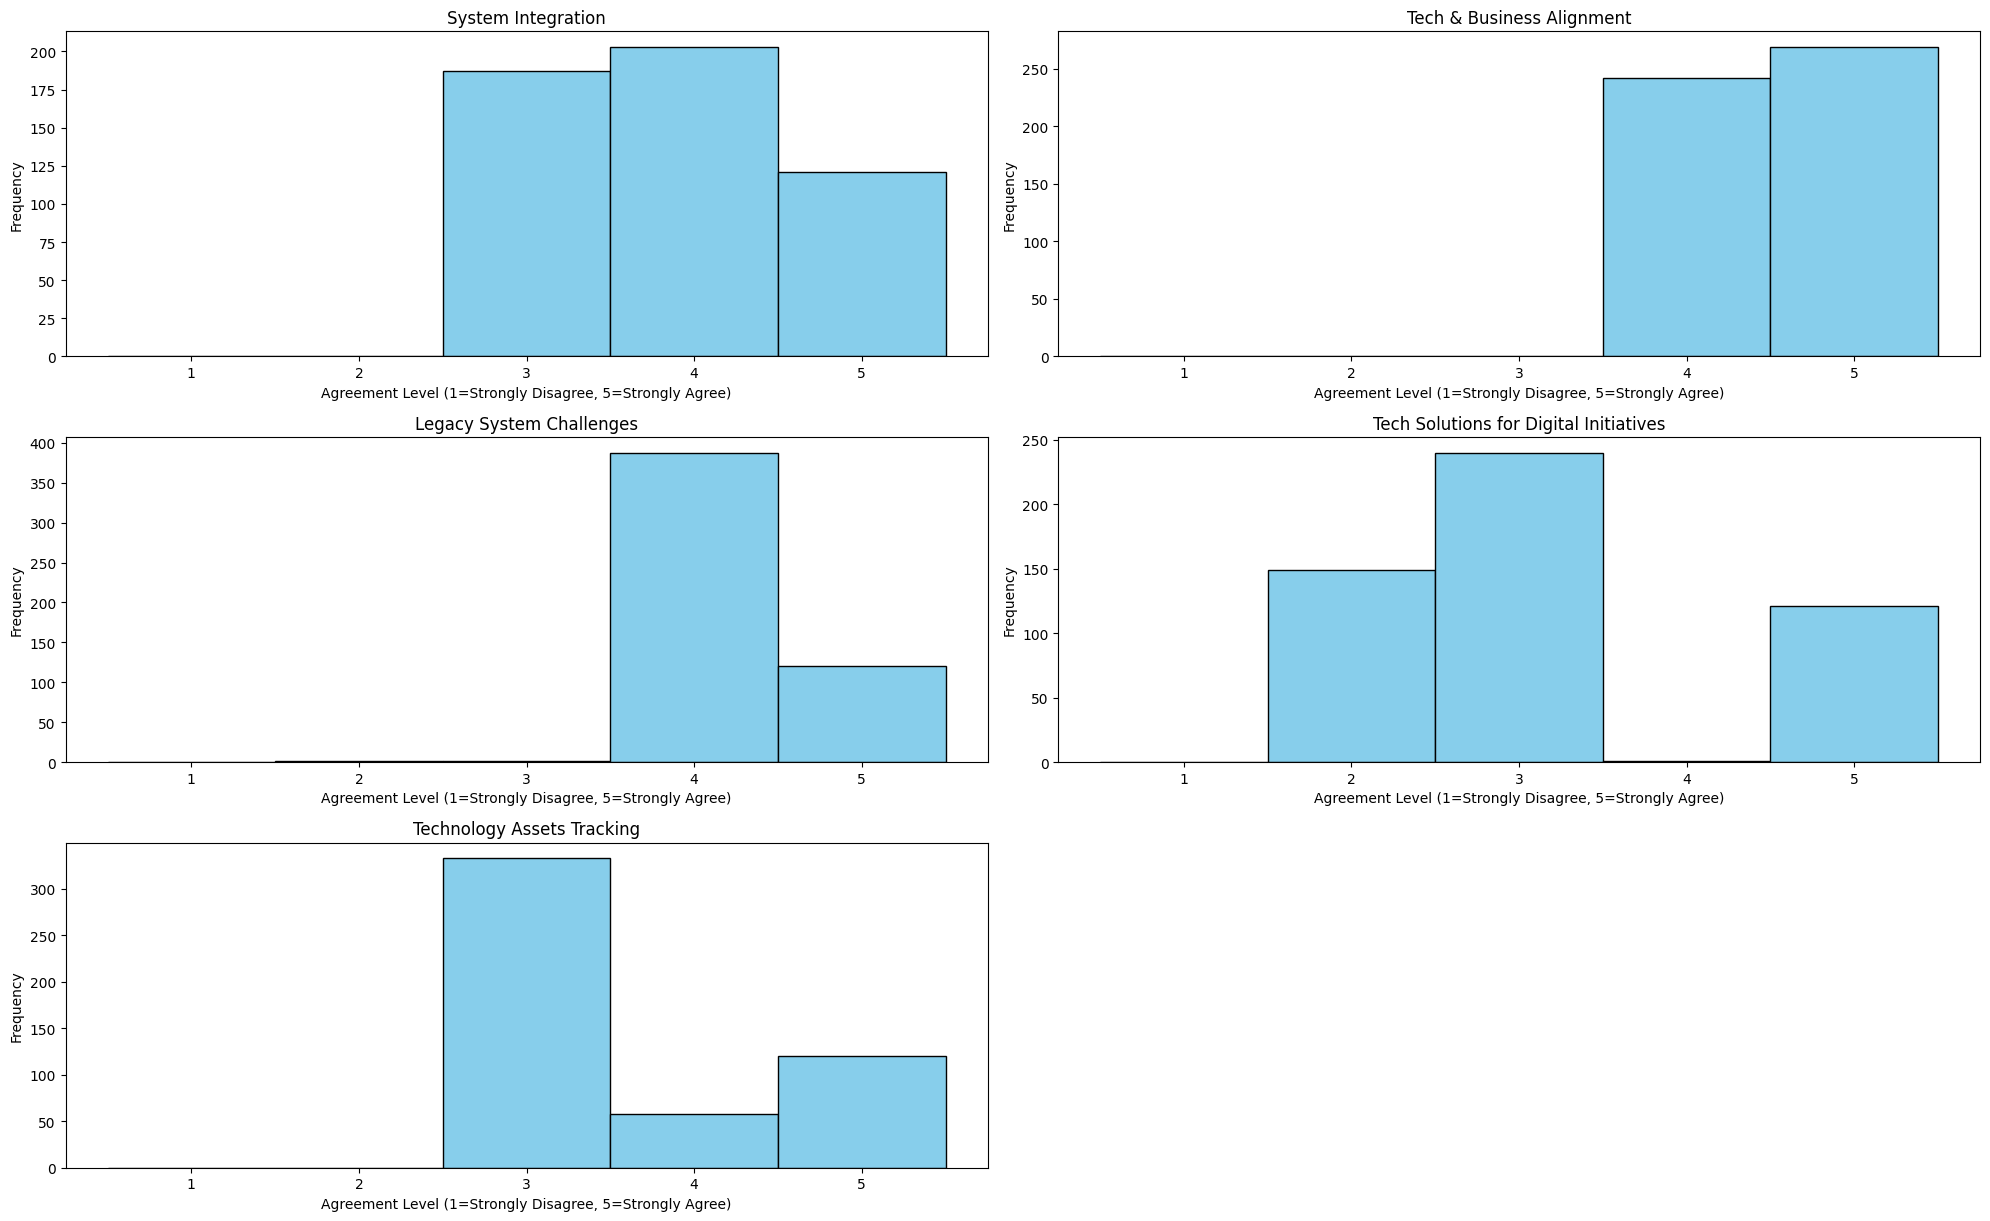

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '3.1_system_integration': 'System Integration',
    '3.2_tech_business_alignment': 'Tech & Business Alignment',
    '3.3_legacy_system_challenges': 'Legacy System Challenges',
    '3.4_tech_solutions_support': 'Tech Solutions for Digital Initiatives',
    '3.5_tech_assets_tracking': 'Technology Assets Tracking'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec3[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

System Integration:

The histogram shows a skew towards agreement (Levels 4 and 5) that system integration is effectively managed, with the majority at Level 4. This suggests that respondents generally feel positive about the integration of various systems within the organization, indicating effective interoperability and data flow between different technology platforms.

Legacy System Challenges:

The responses heavily favor Level 4, indicating strong agreement that legacy systems pose challenges. This dominant response signals widespread recognition of issues such as compatibility, maintenance costs, and limitations posed by outdated technologies, which can hinder progress and efficiency.

Tech & Business Alignment:

Responses are distributed with a mode at Level 4, showing that most respondents agree that there is good alignment between technology and business objectives. This reflects a positive scenario where technology strategies and business goals are well-coordinated, enhancing overall organizational performance.

Tech Solutions for Digital Initiatives:

The histogram peaks at Level 3, indicating a neutral or moderate agreement concerning the effectiveness of tech solutions in supporting digital initiatives. This suggests mixed feelings or uncertainties about whether the current tech solutions are fully capable of supporting or driving digital transformation efforts effectively.

Technology Assets Tracking:

The largest number of responses is at Level 2, indicating disagreement that technology assets are well-tracked. This suggests issues or deficiencies in the management or oversight of technology resources, which could lead to inefficiencies or challenges in asset utilization and lifecycle management.

---
---
Summary:

Overall, the histograms suggest a generally positive perception of system integration and the alignment between technology and business strategies within the organization. However, significant concerns are evident regarding the challenges posed by legacy systems and the tracking of technology assets. The moderate response regarding tech solutions for digital initiatives indicates room for improvement in leveraging technology to drive digital strategies. Addressing these areas could enhance operational efficiencies and better support the organization's digital transformation efforts. By focusing on modernizing legacy systems and improving the tracking of technology assets, the organization could mitigate risks and capitalize on new opportunities more effectively.

### Section 4 distribution

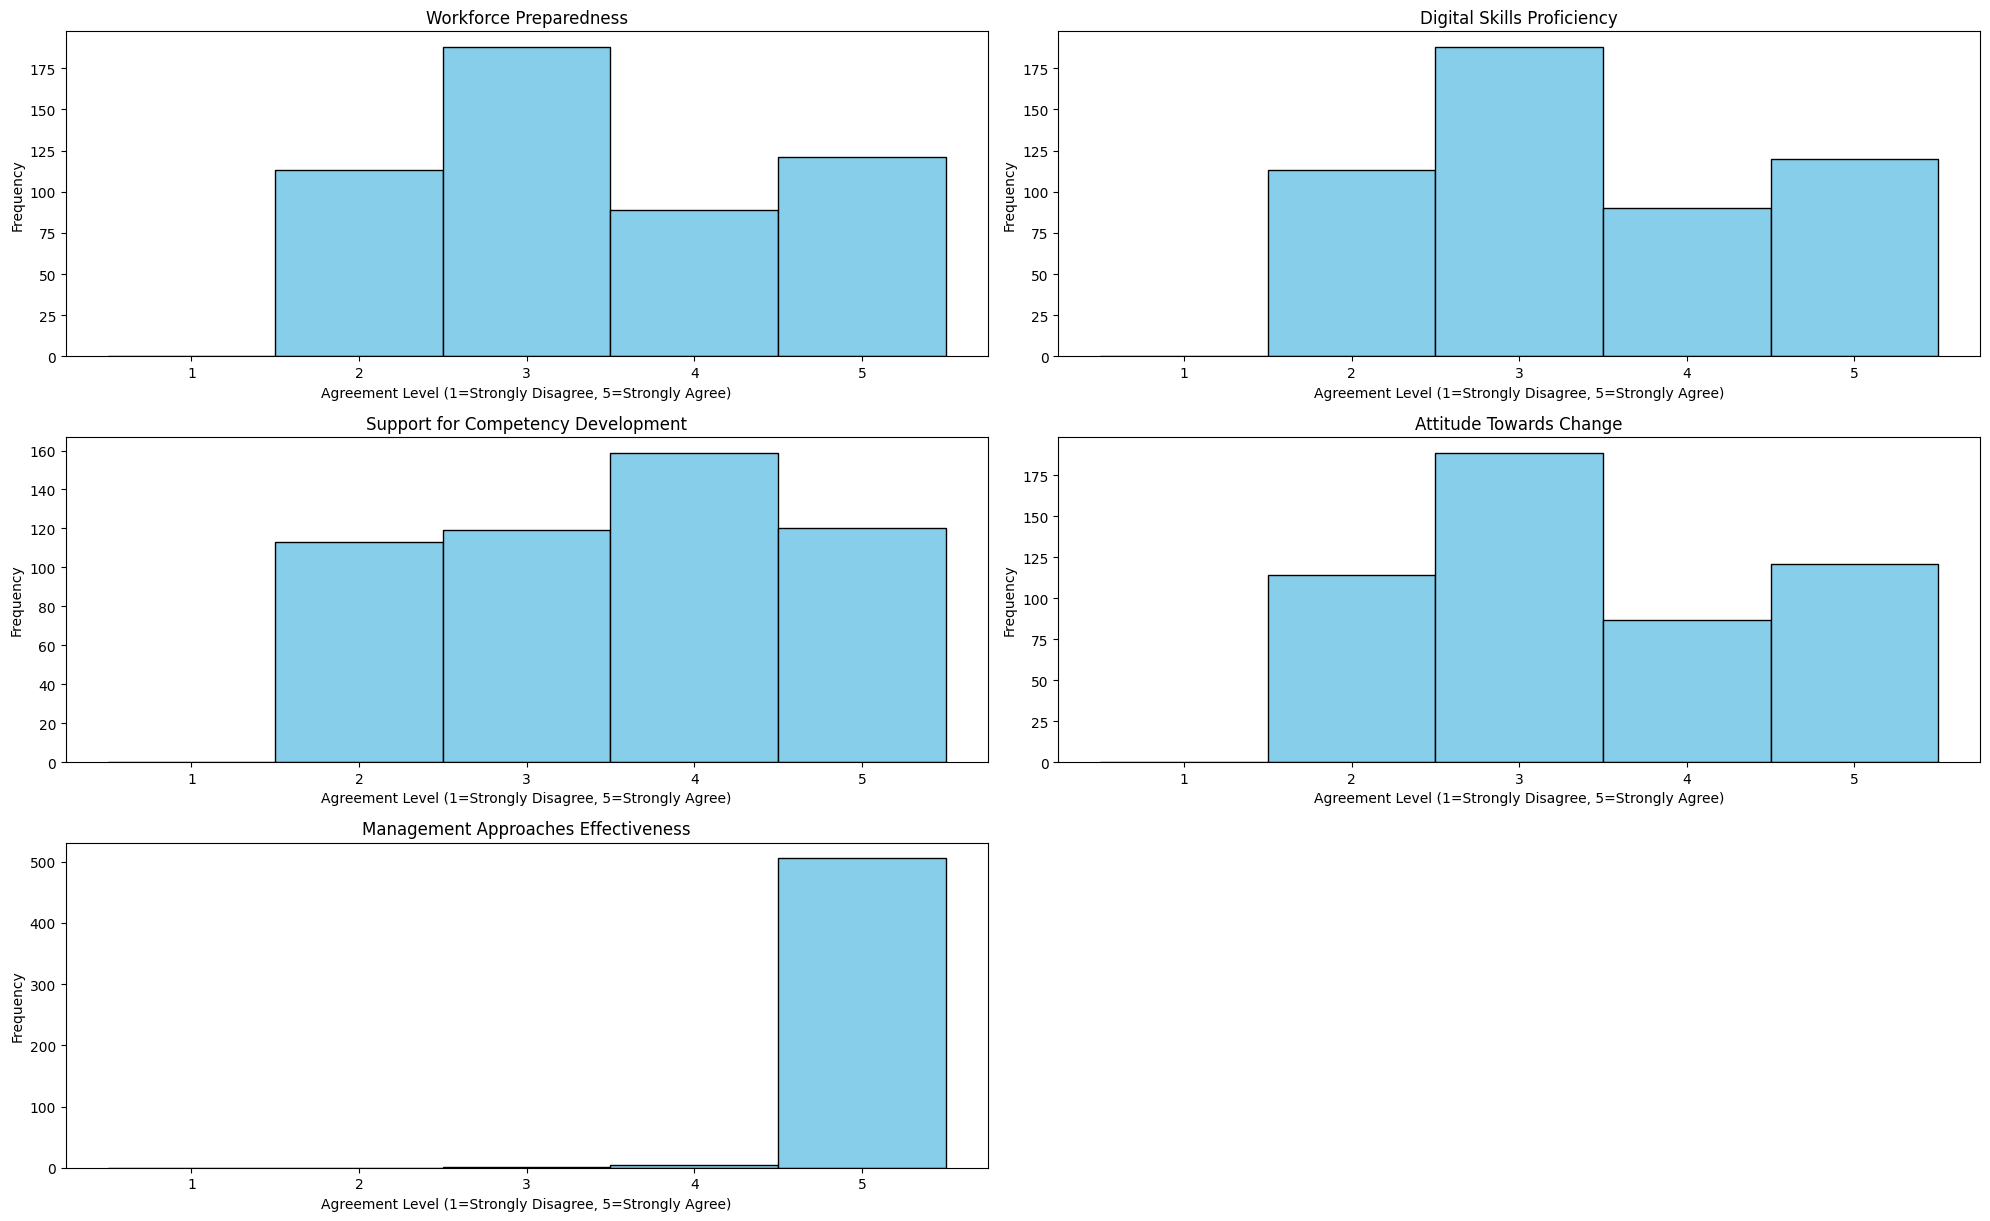

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '4.1_workforce_preparedness': 'Workforce Preparedness',
    '4.2_digital_skills': 'Digital Skills Proficiency',
    '4.3_support_competency_development': 'Support for Competency Development',
    '4.4_attitude_change_innovation': 'Attitude Towards Change',
    '4.5_management_approaches': 'Management Approaches Effectiveness'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec4[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

Workforce Preparedness:

The histogram for workforce preparedness shows the majority of responses clustering at Level 4, suggesting that most respondents agree that the workforce is well-prepared for current organizational challenges. However, there is a significant response at Level 2, indicating a notable proportion of respondents feel the workforce is not adequately prepared.

Support for Competency Development:

Responses for support for competency development are highest at Level 4, indicating strong agreement that there is good support for developing competencies within the organization. However, the distribution is fairly even across Levels 2 through 4, suggesting varied perceptions about the adequacy of support for professional development.

Digital Skills Proficiency:

The histogram for digital skills proficiency shows the majority of responses at Level 3, indicating a neutral position. This suggests that respondents believe digital skills proficiency is average among the workforce. There are also significant responses at Levels 4 and 2, reflecting a mixed perception of digital competency levels.

Attitude Towards Change:

The distribution of responses for attitude towards change is more dispersed with a peak at Level 3, indicating a generally neutral attitude towards change within the organization. The spread across all levels suggests varied feelings about the organization's openness to and management of change.

Management Approaches Effectiveness:

The histogram for the effectiveness of management approaches shows an overwhelming number of responses at Level 4, strongly indicating that the majority of respondents agree that management approaches are effective. This dominant response highlights a positive perception of management’s methods and strategies within the organization.

---
---
Summary:

Overall, the survey results suggest that while there is a strong perception that management approaches are effective and there is good support for competency development, there are mixed feelings about workforce preparedness, digital skills proficiency, and attitudes towards change. The significant agreement on management's effectiveness and support for competency development is encouraging, but the neutral to mixed perceptions on digital skills and attitudes towards change highlight areas for potential improvement. These results could inform organizational focus areas, especially in enhancing digital literacy and fostering a more proactive attitude towards change to better equip the workforce for future challenges.

### Section 5 distribution

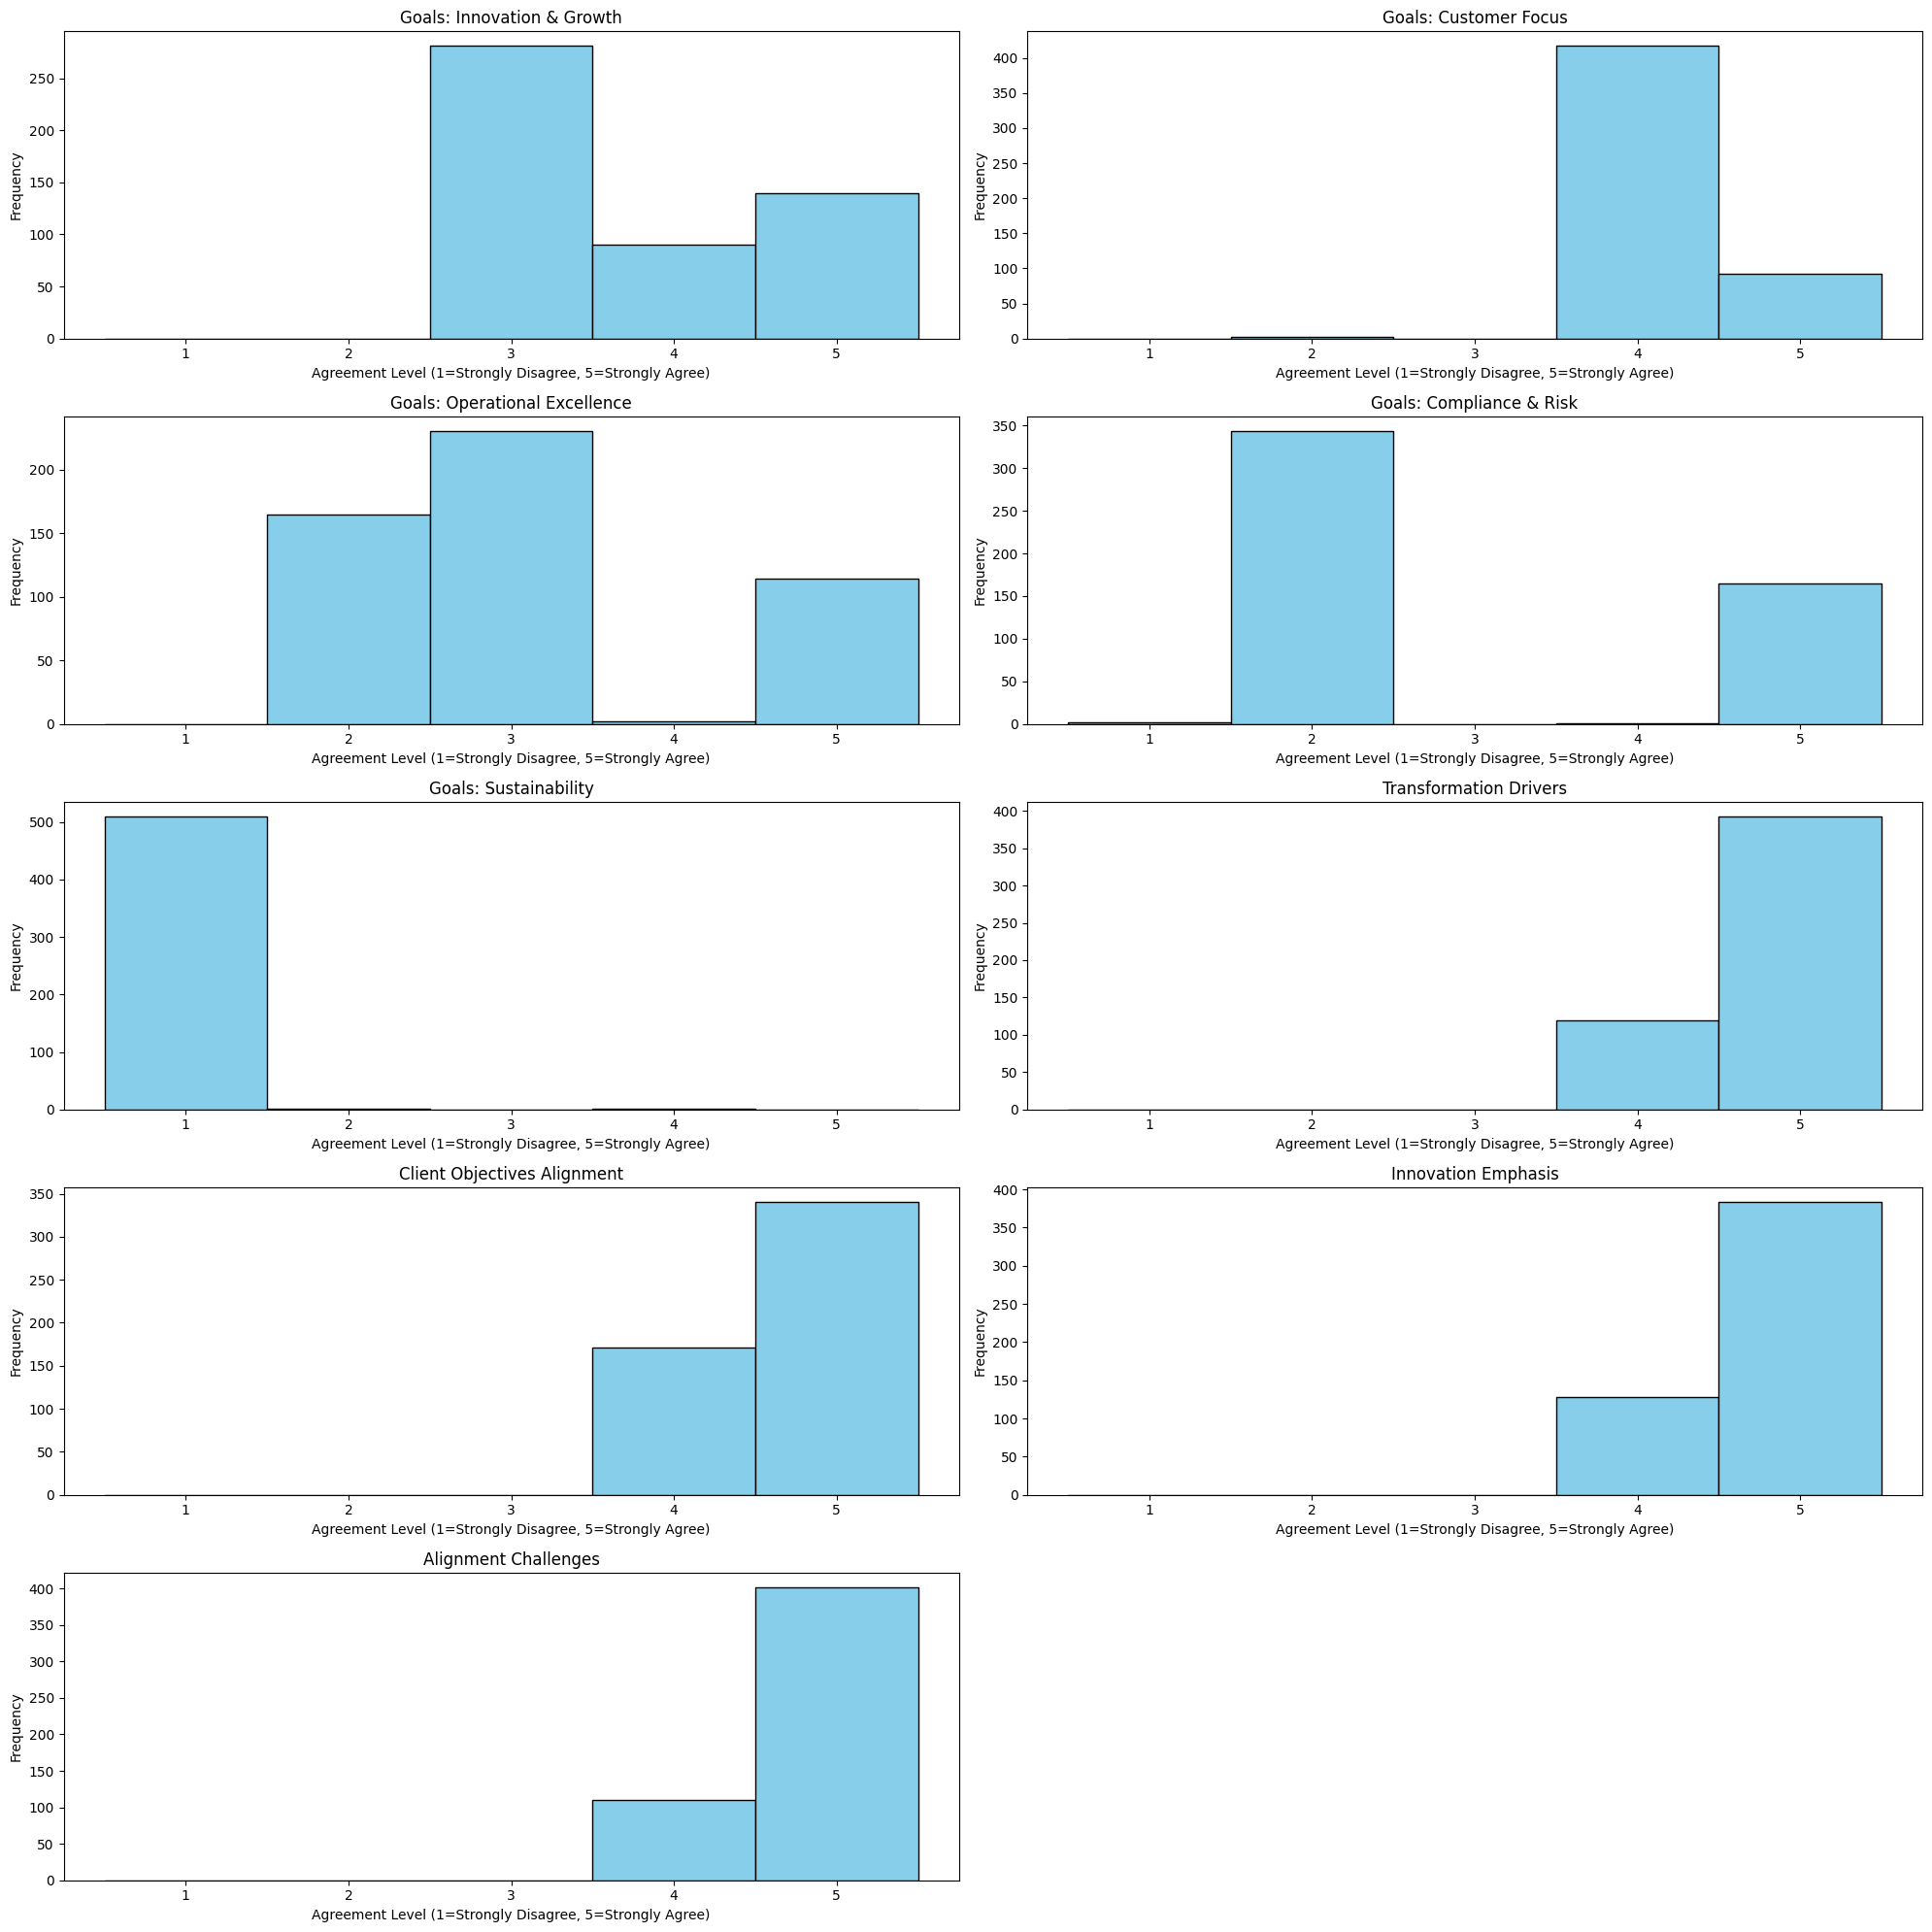

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '5.1_goals_innovation_growth': 'Goals: Innovation & Growth',
    '5.1_goals_customer_focus': 'Goals: Customer Focus',
    '5.1_goals_operational_excellence': 'Goals: Operational Excellence',
    '5.1_goals_compliance_risk': 'Goals: Compliance & Risk',
    '5.1_goals_sustainability': 'Goals: Sustainability',
    '5.2_transformation_drivers': 'Transformation Drivers',
    '5.3_client_objective_alignment': 'Client Objectives Alignment',
    '5.4_innovation_emphasis': 'Innovation Emphasis',
    '5.5_alignment_challenges': 'Alignment Challenges'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec5[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

Goals: Innovation & Growth:

The histogram shows a strong agreement (Level 5) among respondents that innovation and growth are key goals. This indicates that the organization places a high priority on pushing boundaries and expanding its capabilities and market reach.

Goals: Customer Focus:

This chart indicates that the highest agreement is also at Level 5, suggesting that there is a strong organizational focus on customer satisfaction and service. It reflects a commitment to aligning business practices and strategies around the needs of the customer.

Goals: Operational Excellence:

Most respondents agree (Level 4) that operational excellence is a crucial goal. This suggests an emphasis on improving processes, enhancing efficiency, and ensuring that operations are streamlined and effective.

Goals: Compliance & Risk:

Responses peak at Level 4, indicating a strong commitment to compliance and risk management. This goal is important for maintaining the organization’s integrity and meeting regulatory requirements.

Goals: Sustainability:

A significant number of responses are at Level 1, indicating strong disagreement that sustainability is a primary goal. This could suggest that sustainability is not currently a focus area for the organization or is perceived as less critical relative to other goals.

Transformation Drivers:

The histogram peaks dramatically at Level 5, showing strong agreement that certain factors (not specified but typically could include technology, market changes, or competitive pressure) are driving organizational transformation.

Innovation Emphasis:

Responses are highest at Level 5, indicating strong agreement that there is a significant emphasis on innovation within the organization. This aligns with the high priority placed on innovation and growth.

Client Objectives Alignment:

The majority of responses are at Level 2, suggesting some disagreement that client objectives are well-aligned with organizational strategies, indicating potential areas for improvement in understanding or integrating client needs and goals.

Alignment Challenges:

This histogram shows a substantial number of responses at Level 4, indicating that there are notable challenges in alignment within the organization. This could relate to strategic, operational, or cultural alignment issues.

---
---
Summary:

The survey results highlight strong organizational focus and agreement on innovation, growth, customer focus, and operational excellence as key goals, with robust emphasis on innovation and transformation drivers indicating a forward-looking, dynamic approach. However, there are significant concerns regarding sustainability, alignment with client objectives, and internal alignment challenges. These issues suggest areas where the organization might need to focus efforts to enhance coherence between different goals and stakeholders and integrate sustainability more effectively into its core strategy. Addressing these challenges could improve organizational alignment and responsiveness to both client and environmental needs.

### Section 6 distribution

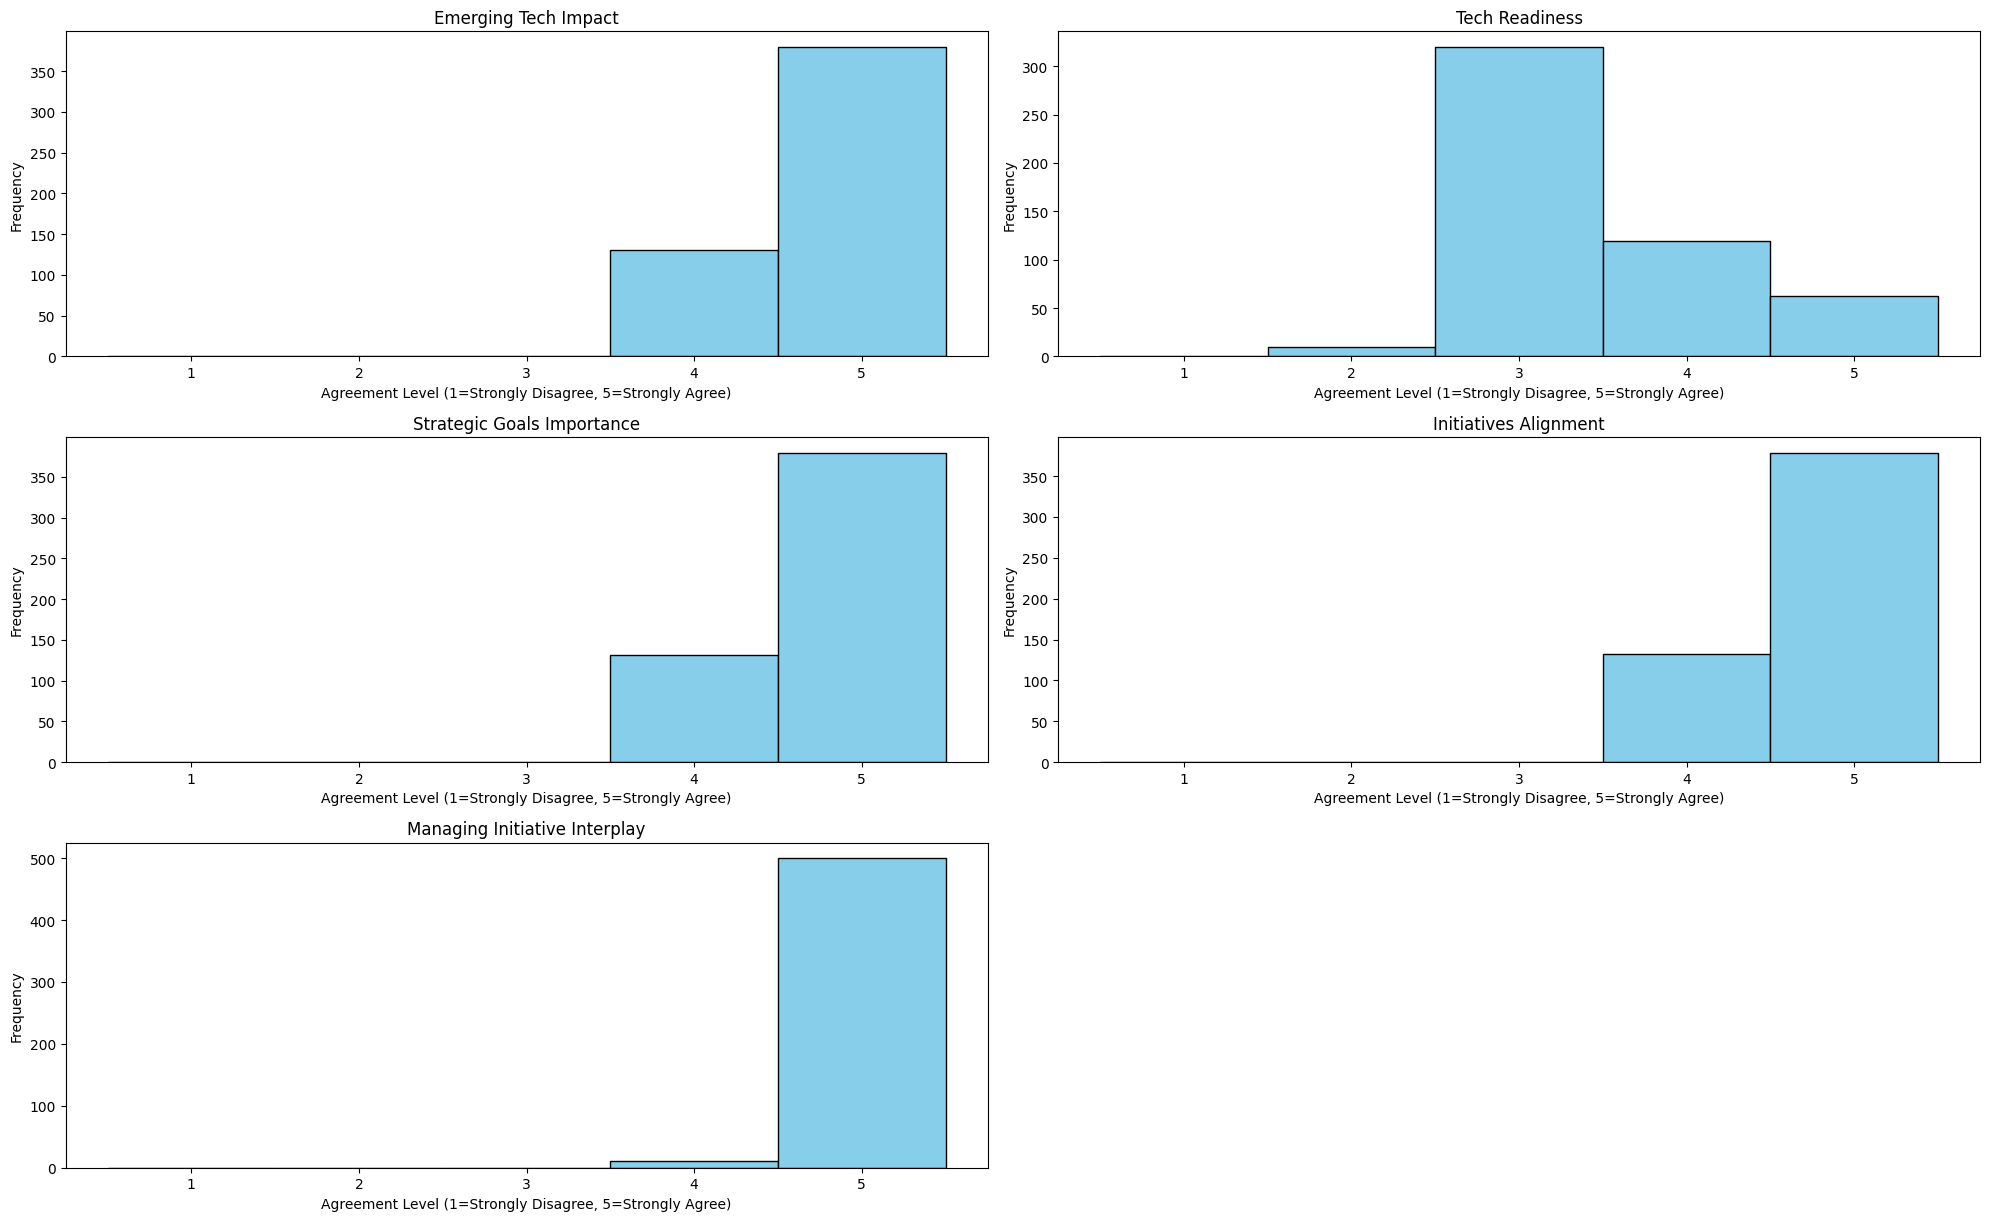

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '6.1_emerging_tech_impact': 'Emerging Tech Impact',
    '6.2_tech_readiness': 'Tech Readiness',
    '6.3_goals_strategic_importance': 'Strategic Goals Importance',
    '6.4_initiative_alignment': 'Initiatives Alignment',
    '6.5_interplay_management': 'Managing Initiative Interplay'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec6[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

Emerging Tech Impact:

The histogram shows a strong agreement (Level 5) among respondents about the significant impact of emerging technologies on the organization. This indicates a widespread belief that new technologies are crucial for the organization’s future success and adaptation to changing market conditions.

Strategic Goals Importance:

Most responses are concentrated at Level 5, suggesting a strong agreement that strategic goals are important to the organization. This reflects a high level of commitment across the organization to achieving its strategic objectives.

Tech Readiness:

The histogram peaks at Level 2, suggesting that the majority of respondents disagree about the organization's readiness to adopt and integrate new technologies effectively. This could indicate potential gaps in infrastructure, skills, or resources needed to leverage technology effectively.

Initiatives Alignment:

Responses are highest at Level 5, indicating strong agreement that various initiatives within the organization are well-aligned. This suggests that efforts across different departments or projects are coordinated towards common goals.

Managing Initiative Interplay:

The largest number of responses is at Level 5, demonstrating strong agreement that the organization is effective at managing the interplay between different initiatives. This indicates an effective strategy for handling multiple projects and priorities without them conflicting with one another.

---
---
Summary:

Overall, the histograms reflect a positive perception of the importance of strategic goals and the alignment of initiatives within the organization, alongside effective management of initiative interplay. However, there appears to be a significant concern regarding tech readiness, suggesting that while the impact of emerging technologies is recognized, the organization may not feel fully equipped to handle these new technologies effectively. Addressing this gap in tech readiness could be crucial for ensuring that the organization can fully capitalize on the opportunities presented by emerging technologies and maintain its competitive edge. Efforts to enhance technical infrastructure, skills development, and resource allocation may be necessary to improve the organization's readiness to adopt and integrate new technologies effectively.

### Section 7 distribution

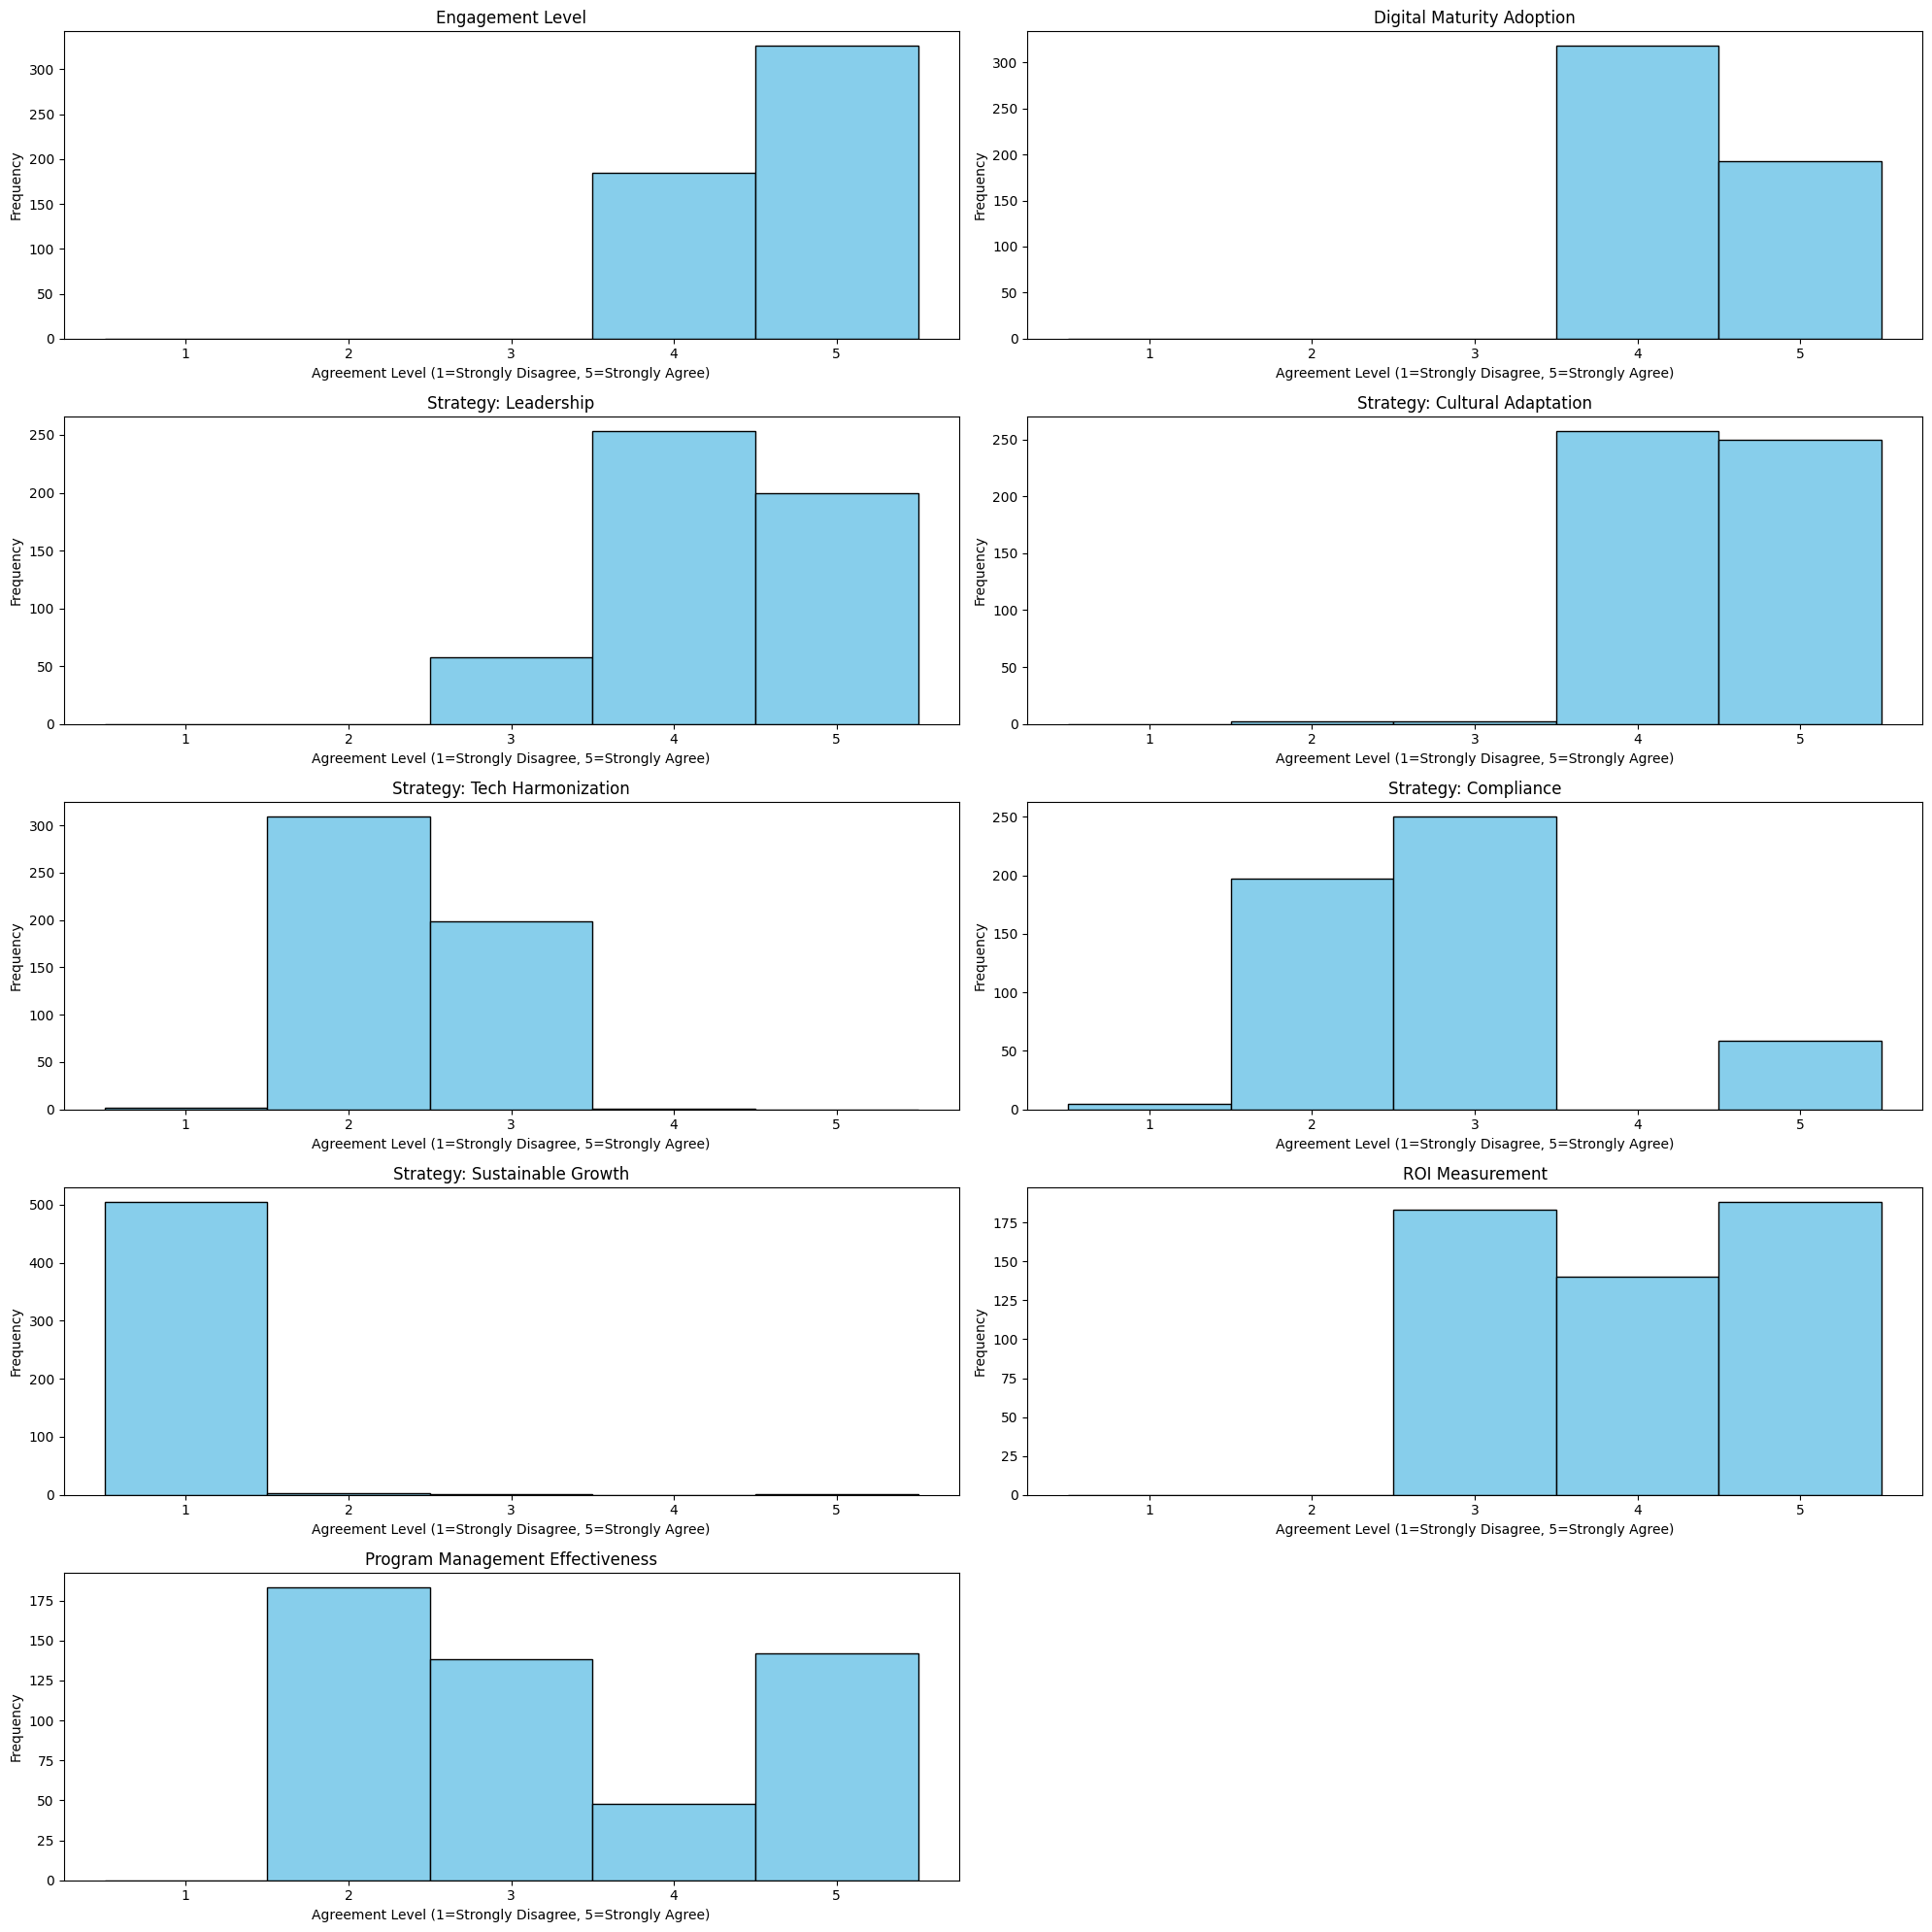

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '7.1_engagement_level': 'Engagement Level',
    '7.2_digital_maturity_adoption': 'Digital Maturity Adoption',
    '7.3_strategy_leadership': 'Strategy: Leadership',
    '7.3_strategy_cultural_adaptation': 'Strategy: Cultural Adaptation',
    '7.3_strategy_tech_harmonization': 'Strategy: Tech Harmonization',
    '7.3_strategy_compliance': 'Strategy: Compliance',
    '7.3_strategy_sustainable_growth': 'Strategy: Sustainable Growth',
    '7.4_roi_measurement': 'ROI Measurement',
    '7.5_program_management': 'Program Management Effectiveness'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 2, i)  # Adjust subplot layout based on the number of questions
    plt.hist(sec7[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(1, 6))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

#### Interpretation

Engagement Level:

The histogram shows a strong positive response at Level 5, suggesting that the engagement level within the organization is high. This indicates that employees are likely very engaged with their work and the organizational culture.

Digital Maturity Adoption:

The peak at Level 5 indicates strong agreement that the organization has effectively adopted digital maturity. This suggests a successful integration of digital technologies and practices within the organizational processes.

Strategy: Leadership:

Responses peak at Level 4, indicating strong agreement but not the strongest, suggesting that while leadership strategies are well-regarded, there might be room for further enhancement or more consistent application across the organization.

Strategy: Cultural Adaptation:

With the highest frequency at Level 4, respondents agree that the organization effectively adapts its culture to meet strategic needs, indicating flexibility and responsiveness in the organizational culture.

Strategy: Tech Harmonization:

The histogram shows responses distributed across Levels 2 through 4, with a peak at Level 4. This indicates variability in perceptions about how well technology is harmonized with business processes, suggesting some areas might not be fully integrated.

Strategy: Compliance:

The majority of responses are at Level 2, indicating a disagreement that compliance strategies are effectively managed. This could highlight areas of concern regarding regulatory or internal compliance within the organization.

Strategy: Sustainable Growth:

The responses are concentrated at Level 1, indicating strong disagreement regarding the effectiveness of strategies for sustainable growth. This suggests significant concerns about the organization’s long-term sustainability practices.

ROI Measurement:

The histogram peaks at Level 5, indicating strong agreement that the organization effectively measures return on investment. This suggests confidence in the metrics and methods used to evaluate financial outcomes and project success.

Program Management Effectiveness:

Responses are distributed, with a peak at Level 3, indicating neutrality. This spread suggests variability in perceptions of program management effectiveness, possibly indicating inconsistencies in program execution or oversight.

---
---
Summary:

Overall, the histograms reflect a mix of strengths and areas for improvement within the organization. High engagement levels and effective digital maturity adoption are clear strengths. However, there are significant concerns about sustainable growth strategies and compliance management, indicating critical areas where the organization needs to focus and improve. The variability in perceptions of technology harmonization and program management effectiveness suggests that experiences may vary significantly between departments or teams, highlighting the need for more consistent management practices across the organization. Addressing these areas could help in ensuring long-term sustainability and compliance, as well as improving overall strategic implementation.

# DIVIDE THE DATASETS TO TARGET AND FEATURE MATRIX

In [ ]:
X = df[['2.1_process_standardization', '2.2_process_optimization',
       '2.3_technology_integration', '2.4_process_agility',
       '2.5_data_driven_improvements', '3.1_system_integration',
       '3.2_tech_business_alignment', '3.3_legacy_system_challenges',
       '3.4_tech_solutions_support', '3.5_tech_assets_tracking',
       '4.1_workforce_preparedness', '4.2_digital_skills',
       '4.3_support_competency_development', '4.4_attitude_change_innovation',
       '4.5_management_approaches', '5.1_goals_innovation_growth',
       '5.1_goals_customer_focus', '5.1_goals_operational_excellence',
       '5.1_goals_compliance_risk', '5.1_goals_sustainability',
       '5.2_transformation_drivers', '5.3_client_objective_alignment',
       '5.4_innovation_emphasis', '5.5_alignment_challenges',
       '6.1_emerging_tech_impact', '6.2_tech_readiness',
       '6.3_goals_strategic_importance', '6.4_initiative_alignment',
       '6.5_interplay_management', '7.1_engagement_level',
       '7.2_digital_maturity_adoption', '7.3_strategy_leadership',
       '7.3_strategy_cultural_adaptation', '7.3_strategy_tech_harmonization',
       '7.3_strategy_compliance', '7.3_strategy_sustainable_growth',
       '7.4_roi_measurement', '7.5_program_management']]

y = df[['1.9_digital_initiatives']]

# PREPROCESSING DATA

## standardisation of the variables

In [ ]:
#standardising the variables
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X.head()

,2.1_process_standardization,2.2_process_optimization,2.3_technology_integration,2.4_process_agility,2.5_data_driven_improvements,3.1_system_integration,3.2_tech_business_alignment,3.3_legacy_system_challenges,3.4_tech_solutions_support,3.5_tech_assets_tracking,...,6.5_interplay_management,7.1_engagement_level,7.2_digital_maturity_adoption,7.3_strategy_leadership,7.3_strategy_cultural_adaptation,7.3_strategy_tech_harmonization,7.3_strategy_compliance,7.3_strategy_sustainable_growth,7.4_roi_measurement,7.5_program_management
0,1.075229,1.075229,1.677896,1.635840,0.835269,1.474975,0.948487,1.749485,1.653094,1.678221,...,0.148324,0.753316,1.283615,1.104207,-0.901087,1.222318,-0.892511,-0.101714,1.162202,1.404983
1,-0.930034,-0.930034,-0.755609,-0.968254,-1.197219,-1.137546,-1.054310,-0.525291,-0.167447,-0.690759,...,0.148324,-1.327465,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171,-1.062187
2,1.075229,1.075229,-0.755609,-0.100223,0.835269,0.168715,0.948487,-0.525291,-1.077718,-0.690759,...,0.148324,-1.327465,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171,-1.062187
3,-0.930034,-0.930034,-0.755609,-0.968254,-1.197219,0.168715,0.948487,-0.525291,-1.077718,-0.690759,...,0.148324,-1.327465,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171,-1.062187
4,1.075229,1.075229,1.677896,1.635840,0.835269,1.474975,0.948487,1.749485,1.653094,1.678221,...,0.148324,0.753316,1.283615,1.104207,-0.901087,1.222318,-0.892511,-0.101714,1.162202,0.582593


In [ ]:
def find_components(X, y):
  n_components = list(range(5,45))
  score = []
  for comp in n_components:
    pca = PCA(comp)
    X_pca = pca.fit_transform(df)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

    dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 42)
    dummy_clf.fit(X_train, y_train)
    score.append([dummy_clf.score(X_train, y_train), comp])

  return score


In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 42, stratify = y)


# FITTING DUMMY CLASSIFIER FOR BASELINE MODEL

In [ ]:
y.value_counts()

1.9_digital_initiatives
4                          363
3                          103
2                           38
1                            7
Name: count, dtype: int64

## Fitting the model

In [ ]:
from sklearn.metrics import f1_score, classification_report

In [ ]:
dummy_clf = DummyClassifier(strategy = 'most_frequent', random_state = 42)
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_train, y_train)

0.7107843137254902

## Evaluating the model

### classification report

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dummy_clf.predict(X_test)

# Evaluate the classifier
f1 = f1_score(y_test, y_pred, average="macro")
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'F1 Score: {f1}, \n \n Classification Report: \n {classification_report(y_test, y_pred)}')

F1 Score: 0.20738636363636362, 
 
 Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        21
           4       0.71      1.00      0.83        73

    accuracy                           0.71       103
   macro avg       0.18      0.25      0.21       103
weighted avg       0.50      0.71      0.59       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### confusion matrix

In [ ]:
conf_matrix

array([[ 0,  0,  0,  1],
       [ 0,  0,  0,  8],
       [ 0,  0,  0, 21],
       [ 0,  0,  0, 73]])

#### Interpretation

From this confusion matrix, we can infer that:

Poor Performance for Classes 0, 1, and 2: The classifier does not correctly predict any instance of classes 0, 1, and 2. All instances of these classes are predicted as class 3.

Class Imbalance Handling: It appears that the classifier is heavily biased towards predicting class 3, which may indicate class imbalance in the dataset or that the dummy classifier is not effective at differentiating between the classes.

Dummy Classifier Behavior: A dummy classifier is a simple model that makes predictions based on simple rules (like most frequent class). The confusion matrix here suggests that the dummy classifier is predicting the most frequent class (class 3) for all instances, regardless of the actual class.

Overall, this confusion matrix shows that the dummy classifier performs very poorly in this scenario, as it fails to correctly classify any instance of classes 0, 1, and 2, and always predicts class 3.

# FITTING CLASSIFICATION MODEL AFTER PREPROCESSING

## FEATURE SELECTION

### Flowchart

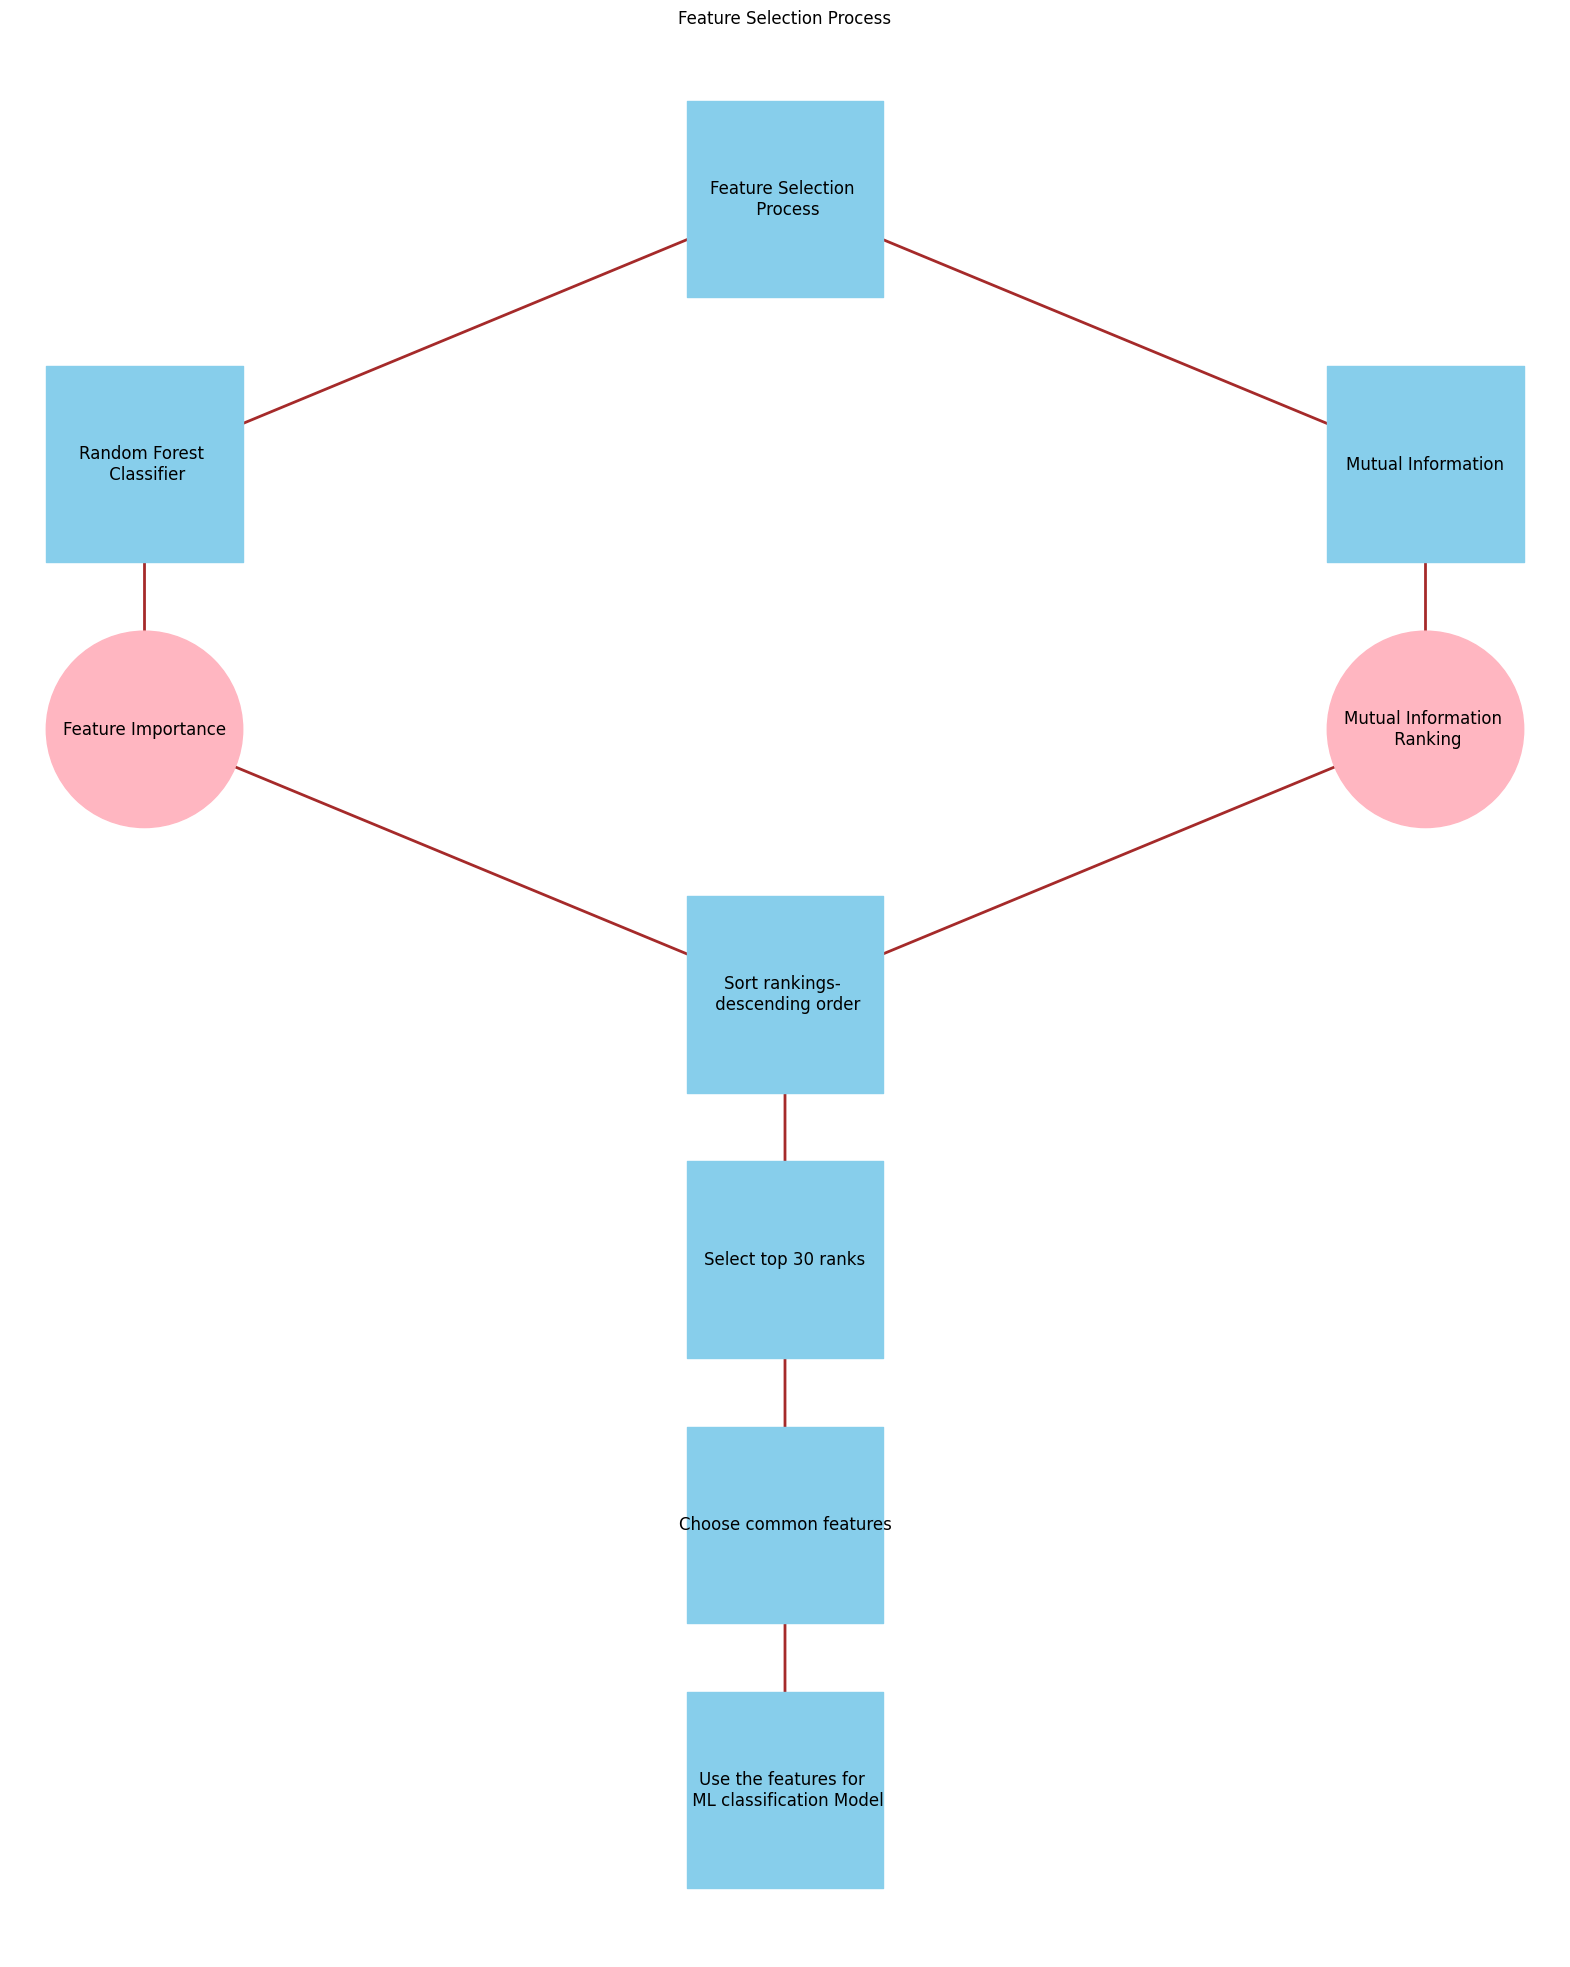

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize = (20, 25))

# Initialize the directed graph
G = nx.DiGraph()

# Add nodes with positions and labels
nodes = {
    'A': {'pos': (0, 3), 'label': f'Feature Selection \n Process', 'shape': 'rectangle', 'color': 'skyblue'},
    'B': {'pos': (-1, 2), 'label': f'Random Forest \n Classifier', 'shape': 'rectangle', 'color': 'skyblue'},
    'C': {'pos': (1, 2), 'label': 'Mutual Information', 'shape': 'rectangle', 'color': 'skyblue'},
    'B1': {'pos': (-1, 1), 'label': 'Feature Importance', 'shape': 'ellipse', 'color': 'lightpink'},
    'C1': {'pos': (1, 1), 'label': f'Mutual Information \n Ranking', 'shape': 'ellipse', 'color': 'lightpink'},
    'D': {'pos': (0, 0), 'label': f'Sort rankings- \n descending order', 'shape': 'rectangle', 'color': 'skyblue'},
    'E': {'pos': (0, -1), 'label': 'Select top 30 ranks', 'shape': 'rectangle', 'color': 'skyblue'},
    'F': {'pos': (0, -2), 'label': 'Choose common features', 'shape': 'rectangle', 'color': 'skyblue'},
    'G': {'pos': (0, -3), 'label': f'Use the features for \n ML classification Model', 'shape': 'rectangle', 'color': 'skyblue'}
}

for node, data in nodes.items():
    G.add_node(node, pos=data['pos'], label=data['label'], shape=data['shape'], color=data['color'], size = 5)

# Add edges
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'B1'),
    ('C', 'C1'),
    ('B1', 'D'),
    ('C1', 'D'),
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'G')
]
G.add_edges_from(edges)

# Define the node shapes and colors
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')
colors = nx.get_node_attributes(G, 'color')

# Draw the nodes with different shapes
for shape in set(nx.get_node_attributes(G, 'shape').values()):
    if shape == 'ellipse':
        nodes_of_shape = [node for node, attr in nx.get_node_attributes(G, 'shape').items() if attr == shape]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_shape, node_shape='o', node_color=[colors[node] for node in nodes_of_shape], node_size=20000)
    else:
        nodes_of_shape = [node for node, attr in nx.get_node_attributes(G, 'shape').items() if attr == shape]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_shape, node_shape='s', node_color=[colors[node] for node in nodes_of_shape], node_size=20000)  # Increased node_size for rectangles

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='brown', width=2)

# Draw the labels
nx.draw_networkx_labels(G, pos, labels)

# Display the plot
plt.title('Feature Selection Process')
plt.axis('off')
plt.show()


##### Interpretation

Feature Selection Process
---

1. Feature Selection Process (Root Node)

  This is the starting point of the feature selection process.
  Random Forest Classifier and Mutual Information (Child Nodes)

2. Two methods are used for feature selection:

 Random Forest Classifier: A machine learning algorithm used to determine feature importance.

 Mutual Information: A method used to evaluate the dependency between variables.

 **Feature Importance (Child of Random Forest Classifier)**

 Feature Importance: The Random Forest Classifier identifies the importance of each feature based on how much it contributes to the prediction.

 **Mutual Information Ranking (Child of Mutual Information)**

 Mutual Information Ranking: This method ranks the features based on the mutual information score, indicating the strength of the relationship between features and the target variable.

3. Sort the rankings in descending order (Child Node)

 The rankings from both methods are sorted in descending order to prioritize the most important features.

4. Select top 30 ranks (Child Node)

 The top 30 features from the sorted rankings are selected.

5. Choose common features (Child Node)

 Among the selected top 30 features, the common features identified by both methods are chosen.
Use the features for ML classification Model (Final Node)

6. The chosen common features are then used to train the machine learning classification model.

---
---
**Summary**
---

The flowchart outlines a feature selection process involving two methods (Random Forest Classifier and Mutual Information). Both methods rank the features, and the process selects the top features from both methods, chooses the common ones, and uses these selected features for training a machine learning classification model. This approach aims to enhance the model's performance by focusing on the most relevant features.

### Splitting the datset in train and test

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# 1. Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_feature_importances = rf.feature_importances_

# 2. Recursive Feature Elimination
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_

# 3. Mutual Information
mi = mutual_info_classif(X_train, y_train, random_state=42)

# Combine results into a DataFrame for comparison
feature_selection_results = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_feature_importances,
    'RFE Ranking': rfe_ranking,
    'Mutual Information': mi
})


<ipython-input-37-13e3b51d6d3d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exampl

In [ ]:
mi_features = feature_selection_results.sort_values(by = ['Mutual Information'], ascending = False)[['Feature']][:30:]
#rfe_features = feature_selection_results.sort_values(by = ['RFE Ranking'], ascending = False)[['Feature']][:25:]
rf_features = feature_selection_results.sort_values(by = ['RF Importance'], ascending = False)[['Feature']][:30:]

merged_df = mi_features.merge(rf_features, on='Feature')
#.merge(rfe_features, on='Feature')
names = list(merged_df['Feature'])
print("Common values using merge:")

Xf_train = X_train.loc[:, X_train.columns.isin(names)]
Xf_train
Xf_test = X_test.loc[:, X_test.columns.isin(names)]
Xf_test

Common values using merge:


,2.2_process_optimization,2.3_technology_integration,2.5_data_driven_improvements,3.1_system_integration,3.2_tech_business_alignment,3.3_legacy_system_challenges,4.3_support_competency_development,4.5_management_approaches,5.1_goals_customer_focus,5.1_goals_operational_excellence,...,6.2_tech_readiness,6.3_goals_strategic_importance,6.4_initiative_alignment,7.2_digital_maturity_adoption,7.3_strategy_leadership,7.3_strategy_cultural_adaptation,7.3_strategy_tech_harmonization,7.3_strategy_compliance,7.3_strategy_sustainable_growth,7.4_roi_measurement
124,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.525291,0.409107,0.094258,-0.422628,-1.027707,...,-2.000188,-1.703163,-1.694465,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-1.185171
84,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.525291,-0.520021,0.094258,-0.422628,-1.027707,...,-0.626403,0.587143,0.590157,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-0.011484
433,1.075229,1.677896,0.835269,1.474975,0.948487,1.749485,1.338235,0.094258,-0.422628,-0.115974,...,0.747382,0.587143,0.590157,1.283615,1.104207,-0.901087,1.222318,-0.892511,-0.101714,1.162202
255,1.075229,-0.755609,0.835269,0.168715,0.948487,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,0.587143,0.590157,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
68,1.075229,-0.755609,0.835269,0.168715,-1.054310,-0.525291,-0.520021,0.094258,2.031495,-0.115974,...,-0.626403,-1.703163,-1.694465,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.525291,-1.449148,0.094258,2.031495,-0.115974,...,-0.626403,-1.703163,-1.694465,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-0.011484
483,1.075229,1.677896,0.835269,1.474975,0.948487,1.749485,1.338235,0.094258,-0.422628,-0.115974,...,2.121167,0.587143,0.590157,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202
275,-0.930034,0.055559,0.835269,0.168715,-1.054310,-0.525291,0.409107,0.094258,-0.422628,-1.027707,...,-0.626403,0.587143,0.590157,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-1.185171
454,1.075229,1.677896,0.835269,1.474975,0.948487,1.749485,1.338235,0.094258,-0.422628,-0.115974,...,0.747382,0.587143,0.590157,1.283615,-1.954057,-0.901087,-0.779619,-1.973252,13.758541,1.162202


In [ ]:
Xf_test.columns

Index(['2.2_process_optimization', '2.3_technology_integration',
       '2.5_data_driven_improvements', '3.1_system_integration',
       '3.2_tech_business_alignment', '3.3_legacy_system_challenges',
       '4.3_support_competency_development', '4.5_management_approaches',
       '5.1_goals_customer_focus', '5.1_goals_operational_excellence',
       '5.1_goals_compliance_risk', '5.2_transformation_drivers',
       '5.3_client_objective_alignment', '6.2_tech_readiness',
       '6.3_goals_strategic_importance', '6.4_initiative_alignment',
       '7.2_digital_maturity_adoption', '7.3_strategy_leadership',
       '7.3_strategy_cultural_adaptation', '7.3_strategy_tech_harmonization',
       '7.3_strategy_compliance', '7.3_strategy_sustainable_growth',
       '7.4_roi_measurement'],
      dtype='object')

### Importance of Feature Selection in ML Classification

Feature selection is a critical step in the machine learning (ML) pipeline, especially for classification tasks. It involves selecting a subset of relevant features (predictors) for use in model construction. Here’s why feature selection is important:

Improves Model Performance:

1. Reduces overfitting by eliminating noise and irrelevant features.

2. Enhances the model's ability to generalize to unseen data.

3. Reduces Computational Cost:

4. Lessens the computational burden by reducing the number of features.

5. Speeds up training and prediction times.

Simplifies Models:

1. Leads to simpler models that are easier to interpret and understand.

2. Helps in identifying the most influential features.

Importance of Feature Selection in Dimensionality Reduction for Small Datasets

For small datasets with a large number of features, dimensionality reduction through feature selection is even more crucial due to the following reasons:

Avoiding the Curse of Dimensionality:

High-dimensional data can lead to overfitting, where the model learns the noise instead of the signal. Feature selection helps mitigate this risk.

Enhancing Generalization:

With fewer data points, it's easier for models to overfit. By selecting the most relevant features, we can improve the model's ability to generalize to new data.

Improving Model Stability:

Small datasets can make models sensitive to the specific features present. Reducing the feature space helps in building more stable and robust models.

Feature Selection Technique Used and Its Impact on Model Improvement

The specific feature selection process applied to the dataset with 511 data points and high class imbalance (38 features) involves the following steps:

Standardization:

Standardizing the feature matrix ensures that all features contribute equally to the analysis, removing biases due to different feature scales.

Feature Selection Using RandomForestClassifier and Mutual Information:

RandomForestClassifier's Feature Importance:
Measures the importance of each feature based on how well it improves the purity of the splits in the decision trees.

Mutual Information:

Measures the mutual dependence between each feature and the target variable, indicating how much information about the target is captured by the feature.

Creating and Sorting Dataframes:

Two dataframes are created, one for each feature selection method, containing features and their corresponding importance scores.

These dataframes are sorted in descending order to identify the top 30 features as determined by each method.

Merging Dataframes:

The dataframes are merged using an 'inner' join, retaining only the features present in both dataframes. This ensures that only the most consistently relevant features are selected.

Final Feature Set:

The resulting merged dataframe contains 23 features that are ranked highly by both selection methods. This intersection of top features from both methods increases confidence in their relevance.
Benefits of This Feature Selection Process
Enhanced Model Performance:

By selecting the top 23 features, the models are trained on the most relevant data, improving their ability to learn meaningful patterns and generalize better to new data.
Reduces the noise and redundancy, which often degrade model performance, especially in small datasets.
Mitigation of Class Imbalance:

The selected features are more likely to capture the underlying patterns that distinguish between the classes, even in the presence of imbalance.
Helps in focusing the model on the most predictive aspects of the data, which is crucial when dealing with imbalanced classes.

Reduced Overfitting:

With fewer but more relevant features, the risk of overfitting is minimized. The models are less likely to memorize the training data and more likely to learn generalizable patterns.

Computational Efficiency:

Training models with 23 features instead of 38 reduces computational costs and speeds up the training and evaluation processes.

Makes hyperparameter tuning more manageable.

---
---
Final Summary

The feature selection process significantly improved the performance of the ML classification models trained on the dataset. By reducing the feature space from 38 to 23, the models benefited from a more focused set of predictors, which enhanced their ability to generalize, especially in the context of a small, imbalanced dataset. This process also mitigated the risk of overfitting and improved computational efficiency. Converting the classification problem to binary further enhanced these benefits, leading to overall better performance metrics. Thus, robust feature selection, combined with appropriate problem transformation, proved essential in building effective classification models in this scenario.

### Histograms

In [ ]:
Xf_train

,2.2_process_optimization,2.3_technology_integration,2.5_data_driven_improvements,3.1_system_integration,3.2_tech_business_alignment,3.3_legacy_system_challenges,4.3_support_competency_development,4.5_management_approaches,5.1_goals_customer_focus,5.1_goals_operational_excellence,...,6.2_tech_readiness,6.3_goals_strategic_importance,6.4_initiative_alignment,7.2_digital_maturity_adoption,7.3_strategy_leadership,7.3_strategy_cultural_adaptation,7.3_strategy_tech_harmonization,7.3_strategy_compliance,7.3_strategy_sustainable_growth,7.4_roi_measurement
208,1.075229,1.677896,0.835269,0.168715,0.948487,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,0.587143,0.590157,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
204,1.075229,-0.755609,0.835269,0.168715,0.948487,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,0.587143,0.590157,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
301,1.075229,-0.755609,0.835269,0.168715,0.948487,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,0.587143,0.590157,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
390,1.075229,1.677896,0.835269,1.474975,0.948487,1.749485,1.338235,0.094258,-0.422628,-0.115974,...,2.121167,0.587143,0.590157,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202
416,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,-1.703163,-1.694465,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.075229,-0.755609,0.835269,0.168715,0.948487,-0.525291,0.409107,0.094258,-0.422628,1.707492,...,-0.626403,0.587143,0.590157,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
270,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.525291,-0.520021,0.094258,-0.422628,-1.027707,...,-0.626403,0.587143,0.590157,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-0.011484
348,1.075229,0.055559,-1.197219,-1.137546,-1.054310,-0.525291,0.409107,-7.933351,-5.330873,0.795759,...,0.747382,0.587143,-1.694465,1.283615,-1.954057,-0.901087,-0.779619,2.349714,-0.101714,-0.011484
435,1.075229,1.677896,0.835269,1.474975,0.948487,1.749485,1.338235,0.094258,-0.422628,-0.115974,...,2.121167,0.587143,0.590157,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202


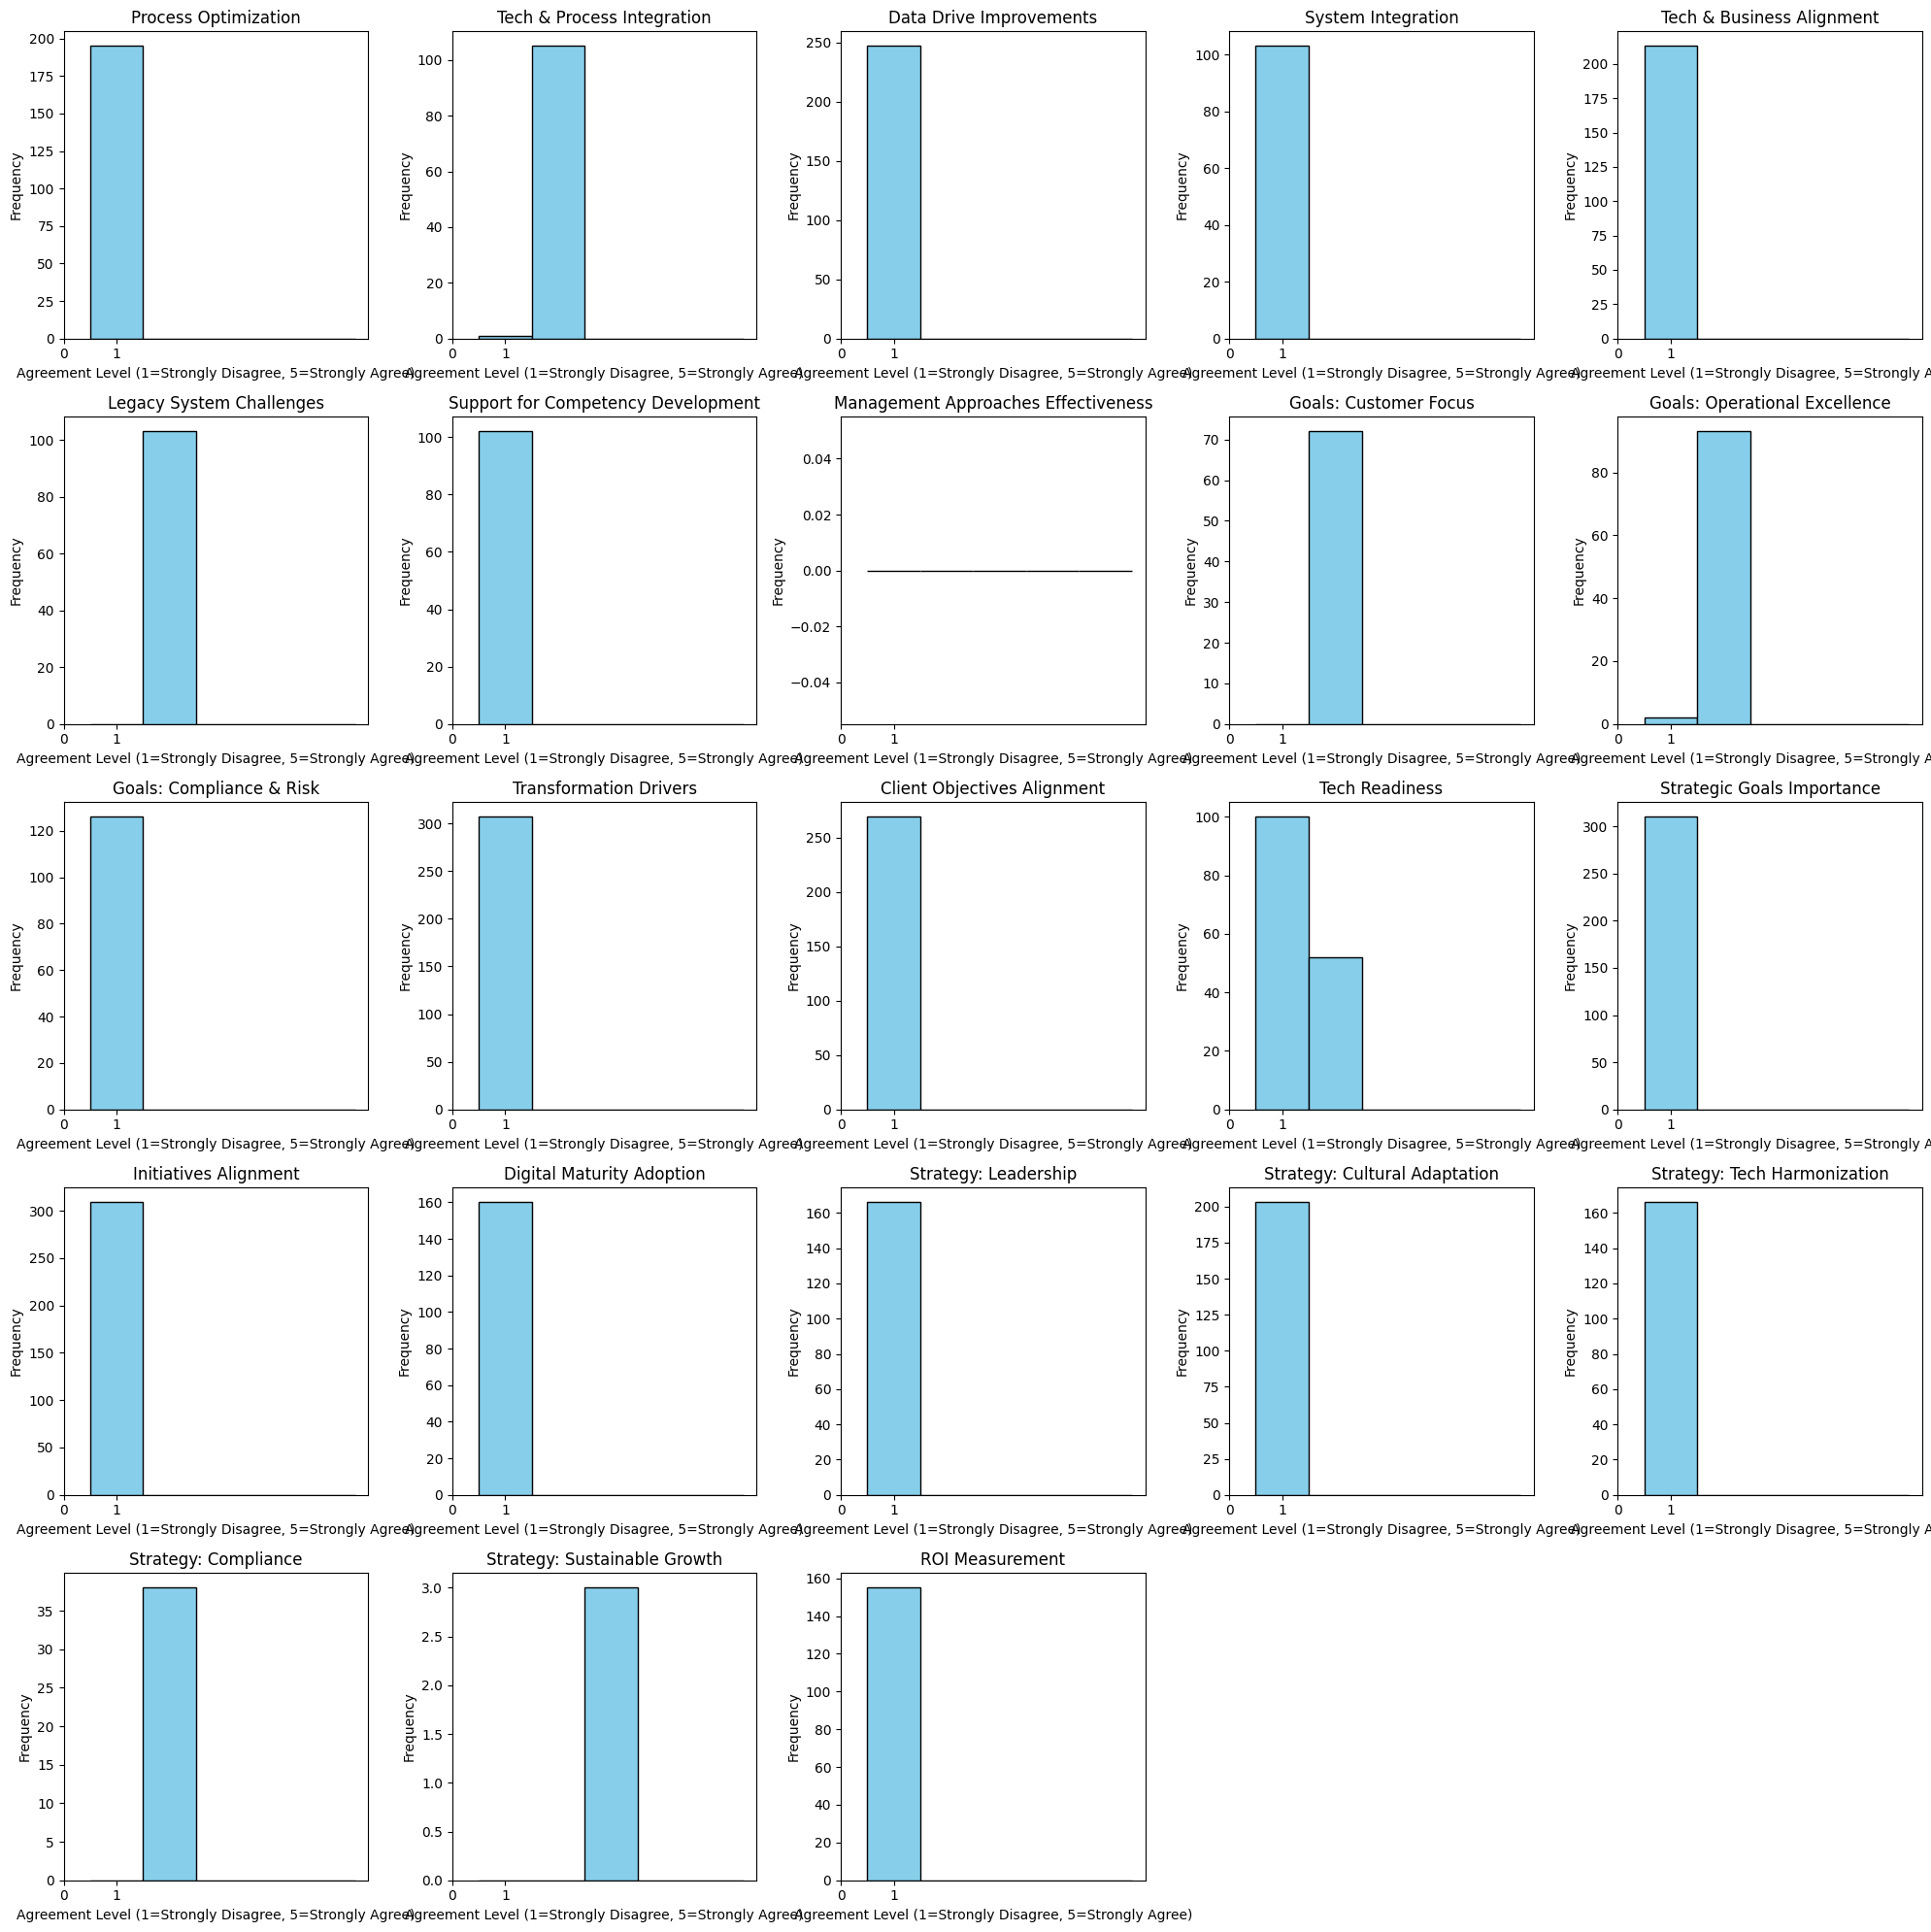

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Shortened questions for histogram titles
short_titles = {
    '2.2_process_optimization': 'Process Optimization',
    '2.3_technology_integration': 'Tech & Process Integration',
    '2.5_data_driven_improvements' : 'Data Drive Improvements',
    '3.1_system_integration': 'System Integration',
    '3.2_tech_business_alignment': 'Tech & Business Alignment',
    '3.3_legacy_system_challenges': 'Legacy System Challenges',
    '4.3_support_competency_development': 'Support for Competency Development',
    '4.5_management_approaches': 'Management Approaches Effectiveness',
    '5.1_goals_customer_focus': 'Goals: Customer Focus',
    '5.1_goals_operational_excellence': 'Goals: Operational Excellence',
    '5.1_goals_compliance_risk': 'Goals: Compliance & Risk',
    '5.2_transformation_drivers': 'Transformation Drivers',
    '5.3_client_objective_alignment': 'Client Objectives Alignment',
    '6.2_tech_readiness': 'Tech Readiness',
    '6.3_goals_strategic_importance': 'Strategic Goals Importance',
    '6.4_initiative_alignment': 'Initiatives Alignment',
    '7.2_digital_maturity_adoption': 'Digital Maturity Adoption',
    '7.3_strategy_leadership': 'Strategy: Leadership',
    '7.3_strategy_cultural_adaptation': 'Strategy: Cultural Adaptation',
    '7.3_strategy_tech_harmonization': 'Strategy: Tech Harmonization',
    '7.3_strategy_compliance': 'Strategy: Compliance',
    '7.3_strategy_sustainable_growth': 'Strategy: Sustainable Growth',
    '7.4_roi_measurement': 'ROI Measurement'
}

# Plotting histograms for each column
plt.figure(figsize=(20, 20))
for i, (column, title) in enumerate(short_titles.items(), 1):
    plt.subplot(5, 5, i)  # Adjust subplot layout based on the number of questions
    plt.hist(Xf_train[column], bins=np.arange(1, 7) - 0.5, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Agreement Level (1=Strongly Disagree, 5=Strongly Agree)')
    plt.ylabel('Frequency')
    plt.xticks(range(0, 2))  # Ensure all Likert scale values are shown

plt.tight_layout()
plt.show()

# MODEL TRAINING

## Process Diagram

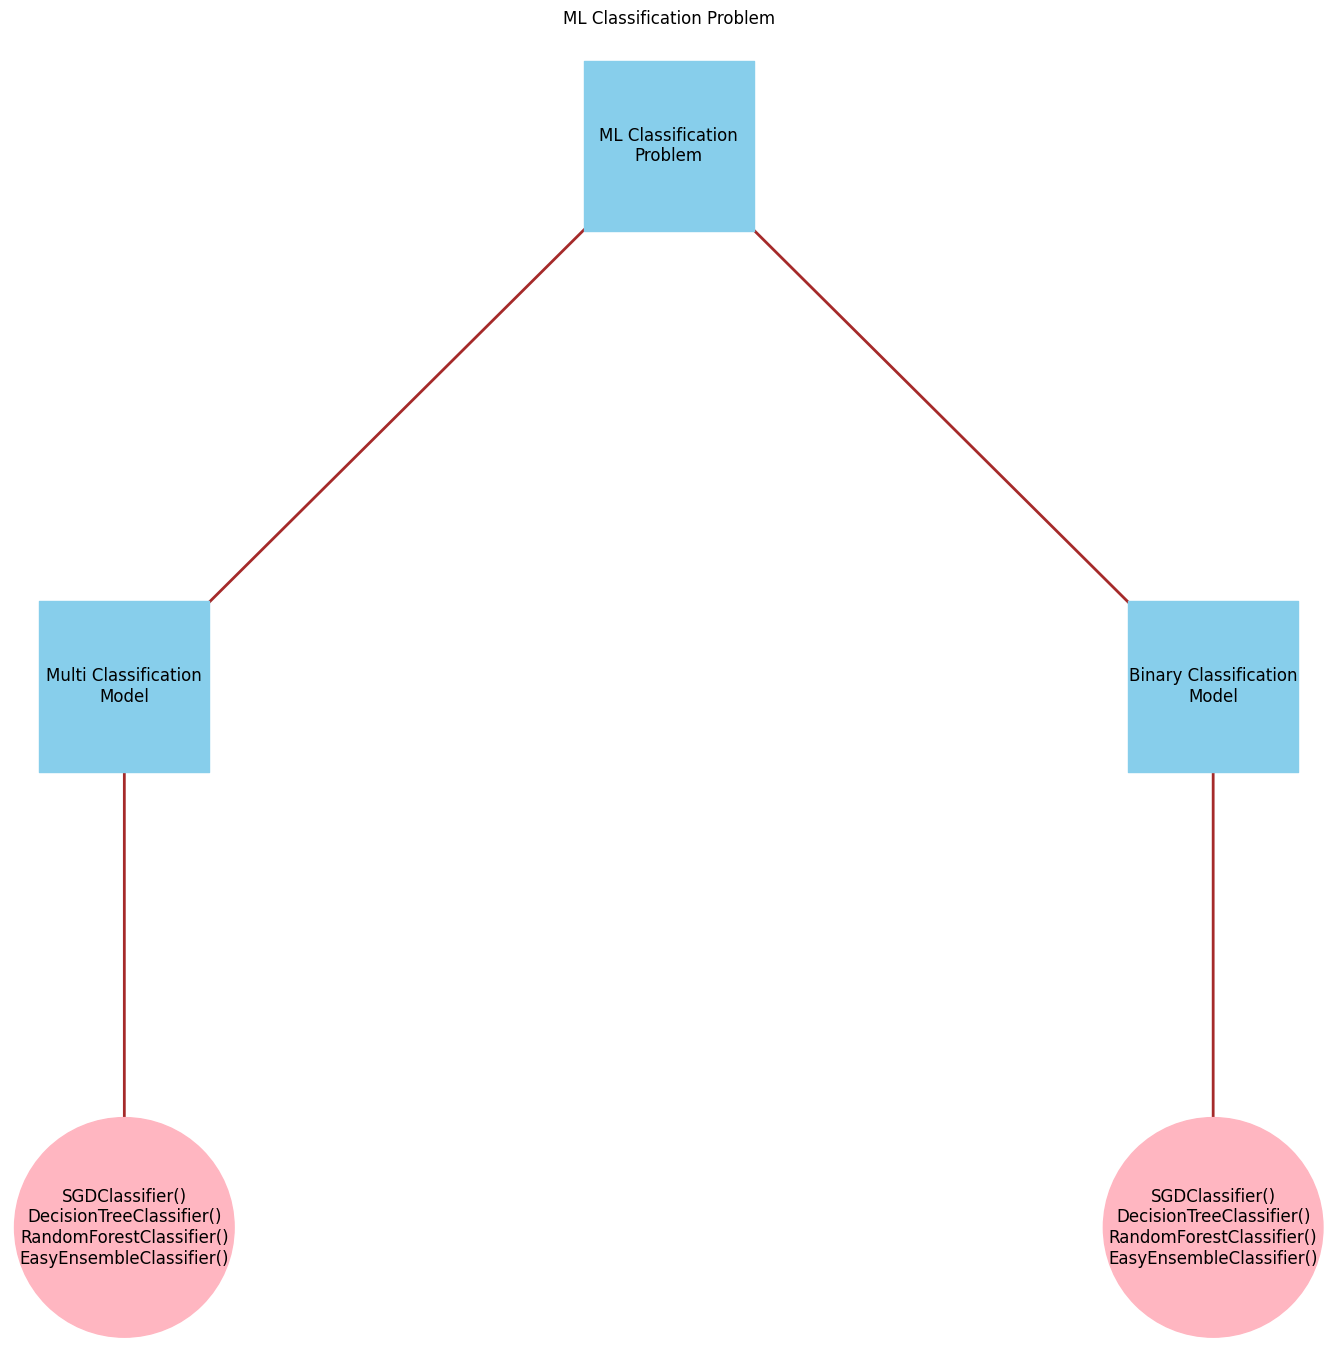

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize = (17,17))

# Initialize the directed graph
G = nx.DiGraph()

# Add nodes with positions and labels
nodes = {
    'A': {'pos': (0, 2), 'label': f'ML Classification\nProblem', 'shape': 'rectangle', 'color': 'skyblue'},
    'B': {'pos': (-1, 1), 'label': f'Multi Classification\nModel', 'shape': 'rectangle', 'color': 'skyblue'},
    'C': {'pos': (1, 1), 'label': 'Binary Classification\nModel', 'shape': 'rectangle', 'color': 'skyblue'},
    'B1': {'pos': (-1, 0), 'label': 'SGDClassifier()\nDecisionTreeClassifier()\nRandomForestClassifier()\nEasyEnsembleClassifier()', 'shape': 'ellipse', 'color': 'lightpink'},
    'C1': {'pos': (1, 0), 'label': 'SGDClassifier()\nDecisionTreeClassifier()\nRandomForestClassifier()\nEasyEnsembleClassifier()', 'shape': 'ellipse', 'color': 'lightpink'}
}

for node, data in nodes.items():
    G.add_node(node, pos=data['pos'], label=data['label'], shape=data['shape'], color=data['color'])

# Add edges
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'B1'),
    ('C', 'C1')
]
G.add_edges_from(edges)

# Define the node shapes and colors
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')
colors = nx.get_node_attributes(G, 'color')

# Draw the nodes with different shapes
for shape in set(nx.get_node_attributes(G, 'shape').values()):
    if shape == 'ellipse':
        nodes_of_shape = [node for node, attr in nx.get_node_attributes(G, 'shape').items() if attr == shape]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_shape, node_shape='o', node_color=[colors[node] for node in nodes_of_shape], node_size=25000)
    else:
        nodes_of_shape = [node for node, attr in nx.get_node_attributes(G, 'shape').items() if attr == shape]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes_of_shape, node_shape='s', node_color=[colors[node] for node in nodes_of_shape], node_size=15000)

# Draw the edges
nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='brown', width=2)

# Draw the labels
nx.draw_networkx_labels(G, pos, labels)

# Display the plot
plt.title('ML Classification Problem')
plt.axis('off')
plt.show()


## LazyPredict Classification Report

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(Xf_train, Xf_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  3%|▎         | 1/29 [00:00<00:09,  2.92it/s]/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
  7%|▋         | 2/29 [00:00<00:05,  4.90it/s]/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataC

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 21
[LightGBM] [Info] Start training from score -4.401829
[LightGBM] [Info] Start training from score -2.643971
[LightGBM] [Info] Start training from score -1.545359
[LightGBM] [Info] Start training from score -0.351785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 29/29 [00:06<00:00,  4.56it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
QuadraticDiscriminantAnalysis      0.25               0.42    None      0.27   
Perceptron                         0.61               0.40    None      0.60   
LabelPropagation                   0.75               0.38    None      0.64   
LabelSpreading                     0.75               0.38    None      0.64   
KNeighborsClassifier               0.69               0.33    None      0.67   
NearestCentroid                    0.50               0.29    None      0.52   
PassiveAggressiveClassifier        0.52               0.29    None      0.56   
RidgeClassifierCV                  0.75               0.28    None      0.65   
DecisionTreeClassifier             0.75               0.28    None      0.65   
RandomForestClassifier             0.75               0.28    None      0.65   
ExtraTreesClassifier               0.75 

In [ ]:
y.value_counts()

1.9_digital_initiatives
4                          363
3                          103
2                           38
1                            7
Name: count, dtype: int64

## SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(eta0 = 0.5,
                    learning_rate = 'adaptive',
                    power_t = 0.5,
                    shuffle = True,
                    random_state = 10,
                    max_iter = 100,
                    class_weight = {4: 1, 3: 2, 2: 3, 1: 4})

param_grid = {'loss' : ['hinge', 'log_loss','modified_huber'],
              'penalty' : ['l1', 'l2', 'elasticnet'],
              'alpha' : [0.1, 0.01, 0.001, 0.0001]}

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'neg_log_loss': 'neg_log_loss'
}

sgd_grid = GridSearchCV(sgd,
                        param_grid,
                        scoring = scoring,
                        refit='f1_macro',
                        cv=10,
                        return_train_score=True,
                        n_jobs = -1)

sgd_grid.fit(Xf_train, y_train)

print("Best parameters:", sgd_grid.best_params_)
print("Best cross-validation f1 macro:", sgd_grid.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'elasticnet'}
Best cross-validation f1 macro: 0.31905908790094006


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the train scores are non-finite: [        nan         nan         nan -0.8779692  -0.80693144 -0.82892319
 -0.83718286 -0.76620189 -0.81261408         nan         nan         nan
 -0.79801557 -0.7684015  -0.77942622 -0.88070882 -0.74555824 -0.75263576
         nan         nan         nan -0.75007903 -0.74876191 -0.74892634
 -0.94764062 -0.82429205 -0.78853731         nan         nan         nan
 -0.74955298 -0.74896869 -0.74885082 -0.93843673 -0.92031283 -0.93740736]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A 

In [ ]:
# Evaluate the best model on the test set
best_model = sgd_grid.best_estimator_
y_sgd_pred = best_model.predict(Xf_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_sgd_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         9
           3       0.14      0.06      0.09        16
           4       0.75      0.93      0.83        76

    accuracy                           0.70       103
   macro avg       0.22      0.25      0.23       103
weighted avg       0.57      0.70      0.63       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### confusion matrix

In [ ]:
confusion_matrix(y_test, y_sgd_pred)

array([[ 0,  0,  1,  1],
       [ 0,  0,  1,  8],
       [ 0,  0,  1, 15],
       [ 1,  0,  4, 71]])

## DECISION TREE CLASSIFER

In [ ]:
# Initialize classifiers with different criteria
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean accuracy = {:.2f}".format(scores_gini.mean()))
print("Entropy Criterion: Mean accuracy = {:.2f}".format(scores_entropy.mean()))

Gini Criterion: Mean accuracy = 0.21
Entropy Criterion: Mean accuracy = 0.22


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01],
    'class_weight' : ['balanced', {4: 1, 3: 2, 2: 3, 1: 4}],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random']
}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', error_score = 'raise')
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predict and evaluate the best model
y_dtc_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_dtc_pred))

Best parameters found:  {'class_weight': {4: 1, 3: 2, 2: 3, 1: 4}, 'criterion': 'gini', 'max_depth': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Classification Report for Best Model:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         6
           3       0.25      0.08      0.12        12
           4       0.74      0.88      0.80        58

    accuracy                           0.68        77
   macro avg       0.25      0.24      0.23        77
weighted avg       0.60      0.68      0.62        77



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### confusion matrix

In [ ]:
confusion_matrix(y_test, y_dtc_pred)

array([[ 0,  0,  0,  1],
       [ 0,  0,  0,  6],
       [ 0,  0,  1, 11],
       [ 0,  4,  3, 51]])

### tree diagram

[Text(0.6032608695652174, 0.9285714285714286, 'x[16] <= 0.705\nentropy = 1.605\nsamples = 408\nvalue = [20, 87, 174, 287]'),
 Text(0.3804347826086957, 0.7857142857142857, 'x[22] <= -0.474\nentropy = 1.415\nsamples = 248\nvalue = [8, 27, 102, 186]'),
 Text(0.1956521739130435, 0.6428571428571429, 'x[6] <= 0.262\nentropy = 1.37\nsamples = 147\nvalue = [0, 27, 54, 111]'),
 Text(0.08695652173913043, 0.5, 'x[17] <= 0.033\nentropy = 1.555\nsamples = 24\nvalue = [0, 9, 12, 15]'),
 Text(0.043478260869565216, 0.35714285714285715, 'entropy = 1.55\nsamples = 14\nvalue = [0, 6, 10, 7]'),
 Text(0.13043478260869565, 0.35714285714285715, 'entropy = 1.335\nsamples = 10\nvalue = [0, 3, 2, 8]'),
 Text(0.30434782608695654, 0.5, 'x[15] <= 0.028\nentropy = 1.3\nsamples = 123\nvalue = [0, 18, 42, 96]'),
 Text(0.21739130434782608, 0.35714285714285715, 'x[13] <= -0.843\nentropy = 1.035\nsamples = 25\nvalue = [0, 3, 4, 22]'),
 Text(0.17391304347826086, 0.21428571428571427, 'entropy = 0.863\nsamples = 6\nvalue =

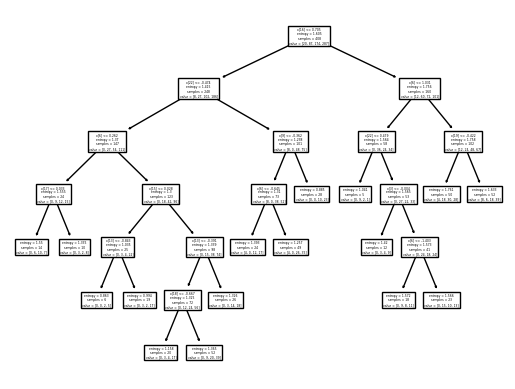

In [ ]:
tree.plot_tree(best_model)

## RANDOM FOREST CLASSIFIER

In [ ]:
# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean accuracy = {:.2f}".format(scores_gini.mean()))
# Initialize classifiers with different criteria
clf_gini = RandomForestClassifier(criterion='gini', random_state=42)
clf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)

# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean accuracy = {:.2f}".format(scores_gini.mean()))
print("Entropy Criterion: Mean accuracy = {:.2f}".format(scores_entropy.mean()))

Gini Criterion: Mean accuracy = 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Gini Criterion: Mean accuracy = 0.23
Entropy Criterion: Mean accuracy = 0.21


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

# Perform stratified k-fold cross-validation with GridSearchCV
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Best parameters found:  {'classifier__class_weight': 'balanced_subsample', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


In [ ]:
# Predict and evaluate the best model
y_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred)), # Initialize classifiers with different criteria
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)


Classification Report for Best Model:
              precision    recall  f1-score   support

           1       0.06      1.00      0.12         2
           2       0.30      0.33      0.32         9
           3       0.11      0.12      0.12        16
           4       0.79      0.45      0.57        76

    accuracy                           0.40       103
   macro avg       0.32      0.48      0.28       103
weighted avg       0.63      0.40      0.47       103



### confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 2,  0,  0,  0],
       [ 3,  3,  2,  1],
       [ 6,  0,  2,  8],
       [21,  7, 14, 34]])

## Easy Ensemble Classifier

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the base estimator
base_estimator = RandomForestClassifier(random_state=42)

# Define the pipeline with StandardScaler and EasyEnsembleClassifier
pipeline = Pipeline([
    ('classifier', EasyEnsembleClassifier(
        estimator = base_estimator,
        n_estimators=5,
        random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__estimator__n_estimators': [100, 200],
    'classifier__estimator__max_depth': [None, 5],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [1, 2]
}

# Perform stratified k-fold cross-validation with GridSearchCV
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predict and evaluate the best model
y_eec_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_eec_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'classifier__estimator__max_depth': None, 'classifier__estimator__min_samples_leaf': 1, 'classifier__estimator__min_samples_split': 5, 'classifier__estimator__n_estimators': 100}
Classification Report for Best Model:
              precision    recall  f1-score   support

           1       0.05      1.00      0.09         2
           2       0.10      0.22      0.14         9
           3       0.25      0.06      0.10        16
           4       0.86      0.39      0.54        76

    accuracy                           0.34       103
   macro avg       0.31      0.42      0.22       103
weighted avg       0.68      0.34      0.43       103



### confusion matrix

In [ ]:
confusion_matrix(y_test, y_eec_pred)

array([[ 2,  0,  0,  0],
       [ 5,  2,  0,  2],
       [ 7,  5,  1,  3],
       [30, 13,  3, 30]])

# BINARY CLASSIFICATION PROBLEM

## CONVERTING PROBLEM TO BINARY CLASSIFICATION MODEL

In [ ]:
y.replace({1 : 0, 2 : 0, 3 : 0, 4 : 1}, inplace = True)

<ipython-input-15-ab29e72ed2a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace({1 : 0, 2 : 0, 3 : 0, 4 : 1}, inplace = True)


In [ ]:
y.value_counts()

1.9_digital_initiatives
1                          363
0                          148
Name: count, dtype: int64

## ROBUST FEATURE SELECTION

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_feature_importances = rf.feature_importances_

# 2. Recursive Feature Elimination
rfe = RFE(estimator=rf, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
rfe_ranking = rfe.ranking_

# 3. Mutual Information
mi = mutual_info_classif(X_train, y_train, random_state=42)

# Combine results into a DataFrame for comparison
feature_selection_results = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_feature_importances,
    'RFE Ranking': rfe_ranking,
    'Mutual Information': mi
})


<ipython-input-17-527426e25993>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

In [ ]:
mi_features = feature_selection_results.sort_values(by = ['Mutual Information'], ascending = False)[['Feature']][:30:]
#rfe_features = feature_selection_results.sort_values(by = ['RFE Ranking'], ascending = False)[['Feature']][:25:]
rf_features = feature_selection_results.sort_values(by = ['RF Importance'], ascending = False)[['Feature']][:30:]

merged_df = mi_features.merge(rf_features, on='Feature')
#.merge(rfe_features, on='Feature')
names = list(merged_df['Feature'])
print("Common values using merge:")

Xf_train = X_train.loc[:, X_train.columns.isin(names)]
Xf_train
Xf_test = X_test.loc[:, X_test.columns.isin(names)]
Xf_test

Common values using merge:


,2.2_process_optimization,2.3_technology_integration,2.5_data_driven_improvements,3.1_system_integration,3.2_tech_business_alignment,3.4_tech_solutions_support,4.3_support_competency_development,4.5_management_approaches,5.1_goals_innovation_growth,5.1_goals_customer_focus,...,6.1_emerging_tech_impact,6.2_tech_readiness,6.3_goals_strategic_importance,7.2_digital_maturity_adoption,7.3_strategy_leadership,7.3_strategy_cultural_adaptation,7.3_strategy_tech_harmonization,7.3_strategy_compliance,7.3_strategy_sustainable_growth,7.4_roi_measurement
124,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.167447,0.409107,0.094258,-0.837348,-0.422628,...,-1.703163,-2.000188,-1.703163,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-1.185171
84,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.167447,-0.520021,0.094258,-0.837348,-0.422628,...,0.587143,-0.626403,0.587143,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-0.011484
433,1.075229,1.677896,0.835269,1.474975,0.948487,1.653094,1.338235,0.094258,1.475544,-0.422628,...,0.587143,0.747382,0.587143,1.283615,1.104207,-0.901087,1.222318,-0.892511,-0.101714,1.162202
255,1.075229,-0.755609,0.835269,0.168715,0.948487,-1.077718,0.409107,0.094258,-0.837348,-0.422628,...,0.587143,-0.626403,0.587143,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-1.185171
68,1.075229,-0.755609,0.835269,0.168715,-1.054310,-0.167447,-0.520021,0.094258,0.319098,2.031495,...,-1.703163,-0.626403,-1.703163,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,-0.930034,-0.755609,-1.197219,-1.137546,-1.054310,-0.167447,-1.449148,0.094258,0.319098,2.031495,...,-1.703163,-0.626403,-1.703163,-0.779050,-0.424925,0.986026,-0.779619,0.188231,-0.101714,-0.011484
483,1.075229,1.677896,0.835269,1.474975,0.948487,1.653094,1.338235,0.094258,1.475544,-0.422628,...,0.587143,2.121167,0.587143,1.283615,-0.424925,0.986026,-0.779619,0.188231,-0.101714,1.162202
275,-0.930034,0.055559,0.835269,0.168715,-1.054310,-0.167447,0.409107,0.094258,-0.837348,-0.422628,...,0.587143,-0.626403,0.587143,-0.779050,1.104207,-0.901087,1.222318,-0.892511,-0.101714,-1.185171
454,1.075229,1.677896,0.835269,1.474975,0.948487,1.653094,1.338235,0.094258,1.475544,-0.422628,...,0.587143,0.747382,0.587143,1.283615,-1.954057,-0.901087,-0.779619,-1.973252,13.758541,1.162202


In [ ]:
Xf_train.columns

Index(['2.2_process_optimization', '2.3_technology_integration',
       '2.5_data_driven_improvements', '3.1_system_integration',
       '3.2_tech_business_alignment', '3.4_tech_solutions_support',
       '4.3_support_competency_development', '4.5_management_approaches',
       '5.1_goals_innovation_growth', '5.1_goals_customer_focus',
       '5.1_goals_compliance_risk', '5.2_transformation_drivers',
       '5.4_innovation_emphasis', '6.1_emerging_tech_impact',
       '6.2_tech_readiness', '6.3_goals_strategic_importance',
       '7.2_digital_maturity_adoption', '7.3_strategy_leadership',
       '7.3_strategy_cultural_adaptation', '7.3_strategy_tech_harmonization',
       '7.3_strategy_compliance', '7.3_strategy_sustainable_growth',
       '7.4_roi_measurement'],
      dtype='object')

## FITTING THE MODEL AND HYPERPARAMETER TUNING

### Lazy Predict

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(Xf_train, Xf_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:04<00:00, 11.51it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 21
[LightGBM] [Info] Start training from score -4.401829
[LightGBM] [Info] Start training from score -2.643971
[LightGBM] [Info] Start training from score -1.545359
[LightGBM] [Info] Start training from score -0.351785
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████| 29/29 [00:04<00:00,  6.37it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

### SGD Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE

sgd = SGDClassifier(eta0 = 0.5,
                    power_t = 0.5,
                    shuffle = True,
                    random_state = 10,
                    learning_rate = 'adaptive',
                    class_weight = {0:1,1:0})

param_grid = {'loss' : ['hinge', 'log_loss', 'log', 'modified_huber'],
              'penalty' : ['l1', 'l2', 'elasticnet'],
              'max_iter' : [100, 1000,5000],
              'alpha' : [0.1, 0.01, 0.001]}

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'neg_log_loss': 'neg_log_loss'
}

sgd_grid = GridSearchCV(sgd,
                        param_grid,
                        scoring = scoring,
                        refit='f1_macro',
                        cv=5,
                        return_train_score=True,
                        n_jobs = -1)

sgd_grid.fit(Xf_train, y_train)

print("Best parameters:", sgd_grid.best_params_)
print("Best cross-validation accuracy:", sgd_grid.best_score_)



Best parameters: {'alpha': 0.1, 'loss': 'hinge', 'max_iter': 100, 'penalty': 'l1'}
Best cross-validation accuracy: 0.2287235811270373


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [         nan          nan          nan          nan          nan
          nan          nan          nan          nan  -4.11792202
  -4.12733127  -4.11822797  -4.11792202  -4.12733127  -4.11822797
  -4.11792202  -4.12733127  -4.11822797  -4.11792202  -4.12733127
  -4.11822797  -4.11792202  -4.12733127  -4.11822797  -4.11792202
  -4.12733127  -4.11822797 -25.35428446 -25.35428446 -25.35428446
 -25.35428446 -25.35428446 -25.35428446 -25.35428446 -25.35428446
 -25.35428446          nan          nan          nan          nan
          nan          nan          nan          nan          nan
  -4.12845664  -4.25650112  -4.22548647  -4.12845664  -4.25650112
  -4.22548647  -4.12845664  -4.25650112  -4.22548647  -4.12845664
  -4.25650112  -4.22548647  -4.12845664  -4.25650112  -4.22548647
  -4.12845664  -4.25650112  -4.22548647 -25.35428446 -25.35428446
 -

In [ ]:
# Evaluate the best model on the test set
best_model = sgd_grid.best_estimator_
y_bin_sgd_pred = best_model.predict(Xf_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_bin_sgd_pred))

              precision    recall  f1-score   support

           0       0.26      1.00      0.42        27
           1       0.00      0.00      0.00        76

    accuracy                           0.26       103
   macro avg       0.13      0.50      0.21       103
weighted avg       0.07      0.26      0.11       103



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### confusion matrix

In [ ]:
confusion_matrix(y_test, y_bin_sgd_pred)

array([[27,  0],
       [76,  0]])

### Desicion Tree Classifier

In [ ]:
# Initialize classifiers with different criteria
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean f1 macro score = {:.2f}".format(scores_gini.mean()))
print("Entropy Criterion: Mean f1 macro score = {:.2f}".format(scores_entropy.mean()))

Gini Criterion: Mean accuracy = 0.45
Entropy Criterion: Mean accuracy = 0.46


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01],
    'class_weight' : ['balanced', {0:1,1:0}],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random']
}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', error_score = 'raise')
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [ ]:
# Predict and evaluate the best model
y_bin_dtc_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_bin_dtc_pred))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.30      0.33      0.32        27
           1       0.75      0.72      0.74        76

    accuracy                           0.62       103
   macro avg       0.53      0.53      0.53       103
weighted avg       0.63      0.62      0.63       103



#### confusion matrix

In [ ]:
confusion_matrix(y_test, y_bin_dtc_pred)

array([[ 9, 18],
       [21, 55]])

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = ImbPipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [75, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__class_weight': [None, 'balanced', 'balanced_subsample']
}

# Perform stratified k-fold cross-validation with GridSearchCV
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


In [ ]:
# Predict and evaluate the best model
y_bin_rfc_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_bin_rfc_pred)), # Initialize classifiers with different criteria
clf_gini = RandomForestClassifier(criterion='gini', random_state=42)
clf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)
print(f'Random Forest CLF criterion: \n Gini : {clf_gini} \n Entropy : {clf_entropy}')

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.32      0.30      0.31        27
           1       0.76      0.78      0.77        76

    accuracy                           0.65       103
   macro avg       0.54      0.54      0.54       103
weighted avg       0.64      0.65      0.65       103

Random Forest CLF criterion: 
 Gini : RandomForestClassifier(random_state=42) 
 Entropy : RandomForestClassifier(criterion='entropy', random_state=42)


In [ ]:
# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean F1 macro Score = {:.2f}".format(scores_gini.mean()))
# Initialize classifiers with different criteria
clf_gini = RandomForestClassifier(criterion='gini', random_state=42)
clf_entropy = RandomForestClassifier(criterion='entropy', random_state=42)

# Perform cross-validation for each criterion
scores_gini = cross_val_score(clf_gini, Xf_train, y_train, cv=5, scoring='f1_macro')
scores_entropy = cross_val_score(clf_entropy, Xf_train, y_train, cv=5, scoring='f1_macro')

print("Gini Criterion: Mean f1 macro score = {:.2f}".format(scores_gini.mean()))
print("Entropy Criterion: Mean f1 macro score = {:.2f}".format(scores_entropy.mean()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Gini Criterion: Mean F1 macro Score = 0.46


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Gini Criterion: Mean f1 macro score = 0.46
Entropy Criterion: Mean f1 macro score = 0.47


#### confusion matrix

In [ ]:
confusion_matrix(y_test,y_bin_rfc_pred)

array([[ 8, 19],
       [17, 59]])

### Easy Ensemble CLassifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the base estimator
base_estimator = RandomForestClassifier(random_state=42)

# Define the pipeline with StandardScaler and EasyEnsembleClassifier
pipeline = Pipeline([
    ('classifier', EasyEnsembleClassifier(
        estimator = base_estimator,
        n_estimators=10,
        random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__estimator__n_estimators': [75, 100],
    'classifier__estimator__max_depth': [None, 5],
    'classifier__estimator__min_samples_split': [2, 5],
    'classifier__estimator__min_samples_leaf': [1, 2]
}

# Perform stratified k-fold cross-validation with GridSearchCV
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
grid_search.fit(Xf_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'classifier__estimator__max_depth': None, 'classifier__estimator__min_samples_leaf': 2, 'classifier__estimator__min_samples_split': 2, 'classifier__estimator__n_estimators': 100}


In [ ]:
# Predict and evaluate the best model
y_bin_eec_pred = best_model.predict(Xf_test)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_bin_eec_pred))

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.35      0.52      0.42        27
           1       0.79      0.66      0.72        76

    accuracy                           0.62       103
   macro avg       0.57      0.59      0.57       103
weighted avg       0.68      0.62      0.64       103



#### confusion matrix

In [ ]:
confusion_matrix(y_test,y_bin_eec_pred)

array([[14, 13],
       [26, 50]])

# SUMMARY OF COMPARISON OF THE FOUR CLASSIFICATION MODELS AND THE 2 CLASSIFICATION PROBLEMS SOLVED

Model Comparison and Analysis
---

***Multiclass Classification Models***

SGDClassifier

1. Accuracy: 0.70
2. Macro Avg F1-Score: 0.23
3. Weighted Avg F1-Score: 0.63
4. Class 4 F1-Score: 0.83

---
DecisionTreeClassifier

1. Accuracy: 0.65
2. Macro Avg F1-Score: 0.30
3. Weighted Avg F1-Score: 0.63
4. Class 4 F1-Score: 0.79

---
RandomForestClassifier

1. Accuracy: 0.40
2. Macro Avg F1-Score: 0.28
3. Weighted Avg F1-Score: 0.47
4. Class 4 F1-Score: 0.57

---
EasyEnsembleClassifier

1. Accuracy: 0.34
2. Macro Avg F1-Score: 0.22
3. Weighted Avg F1-Score: 0.43
4. Class 4 F1-Score: 0.54

***Binary Classification Models***

SGDClassifier

1. Accuracy: 0.26
2. Macro Avg F1-Score: 0.21
3. Weighted Avg F1-Score: 0.11
4. Class 1 (former class 4) F1-Score: 0.00

---
DecisionTreeClassifier

1. Accuracy: 0.62
2. Macro Avg F1-Score: 0.53
3. Weighted Avg F1-Score: 0.63
4. Class 1 (former class 4) F1-Score: 0.74

---
RandomForestClassifier

1. Accuracy: 0.65
2. Macro Avg F1-Score: 0.54
3. Weighted Avg F1-Score: 0.65
4. Class 1 (former class 4) F1-Score: 0.77

---
EasyEnsembleClassifier

1. Accuracy: 0.62
2. Macro Avg F1-Score: 0.57
3. Weighted Avg F1-Score: 0.64
4. Class 1 (former class 4) F1-Score: 0.72

---
---
Detailed Discussion
---

***Multiclass Classification Models***

SGDClassifier:

High accuracy (0.70) and decent weighted average

F1-score (0.63).

Performs well for class 4 but poorly for other classes.

Strength: Best overall accuracy in multiclass setting.

Weakness: Poor handling of minority classes.

---
DecisionTreeClassifier:

Good balance in F1-scores across classes.

Strength: Better macro average F1-score (0.30) compared to SGD.

Weakness: Slightly lower accuracy than SGD but better performance across all classes.

---
RandomForestClassifier:

Lower accuracy (0.40) and lower weighted average

F1-score (0.47).

Strength: Balanced performance across classes but not significantly better.

Weakness: Underperforms in class 4 compared to other models.

---
EasyEnsembleClassifier:

Lowest accuracy (0.34) and weighted average F1-score (0.43).

Strength: Attempts to balance class distributions.

Weakness: Does not perform well across any particular class.

***Binary Classification Models***

SGDClassifier (Binary):

Lowest accuracy (0.26) and poor F1-scores.

Strength: None.

Weakness: Very poor performance, unable to handle binary conversion effectively.

---
DecisionTreeClassifier (Binary):

Good balance with macro average F1-score (0.53).

Strength: Better performance on minority classes when combined into one class.

Weakness: Lower accuracy compared to the multiclass version.

---
RandomForestClassifier (Binary):

Highest macro and weighted average F1-scores (0.54, 0.65).

Strength: Best performance in binary setting, good balance and high accuracy.

Weakness: Slightly lower F1 for class 1 compared to DecisionTreeClassifier.

---
EasyEnsembleClassifier (Binary):

High macro and weighted average F1-scores (0.57, 0.64).

Strength: Handles binary classification well, balanced performance.

Weakness: Accuracy lower than RandomForest but still strong.

---
---
Summary:

Best Model: RandomForestClassifier (Binary) is the best overall performer.

Why: It achieves the highest macro and weighted average F1-scores, indicating a balanced performance across both classes.

Handling Imbalance: Better handles the class imbalance by combining minority classes into one, thus improving overall performance.

---
---
Conclusion
---

Converting the classification problem into binary classification has significantly improved the overall performance of the models. The F1-scores, particularly for the minority classes, are much better in the binary classification setting. This approach helps address the issues of class imbalance and the small dataset more effectively, providing a more realistic assessment of model performance.

# HOW FAR HAVE WE COME WITH MODEL'S OVERALL PERFORMANCE IMPROVEMENT ???

**Dummy Classifier Output**
---

1. Accuracy: 0.74
2. Macro Avg F1-Score: 0.21
3. Weighted Avg F1-Score: 0.63
4. Class 4 F1-Score: 0.85

Comparison
---

**Dummy Classifier**

High Accuracy: The dummy classifier achieves a high accuracy of 0.74 because it predicts the majority class (class 4) most of the time.

Low Macro Avg F1-Score: The macro average F1-score is low (0.21), indicating poor performance on minority classes (classes 1, 2, and 3).

High Class 4 F1-Score: The high F1-score for class 4 (0.85) shows that the classifier performs well for the majority class but ignores the minority classes.

**Engineered Models**

Multiclass Models:

SGDClassifier:

1. Lower accuracy (0.70) compared to the dummy classifier but slightly higher macro average F1-score (0.23).

2. Feature engineering has marginally improved the performance on minority classes.

DecisionTreeClassifier:

1. Lower accuracy (0.65) but significantly higher macro average F1-score (0.30).

2. Improved performance on minority classes shows that feature engineering and selection helped.

RandomForestClassifier:

1. Lower accuracy (0.40) but better macro average F1-score (0.28) compared to the dummy classifier.

2. Shows balanced performance improvements.

EasyEnsembleClassifier:

1. Lowest accuracy (0.34) but a comparable macro average F1-score (0.22) to the dummy classifier.

2. Attempts to balance performance across classes but still struggles.

---
**Binary Models:**

SGDClassifier:

1. Lowest accuracy (0.26) and macro average F1-score (0.21) among binary models.

2. Feature engineering did not help much.

DecisionTreeClassifier:

1. Higher accuracy (0.62) and macro average F1-score (0.53).

2. Feature engineering and binary conversion significantly improved performance.

RandomForestClassifier:

1. Highest accuracy (0.65) and macro average F1-score (0.54).
2. Best overall performer, indicating that feature engineering and binary conversion greatly improved the
model.

EasyEnsembleClassifier:

1. High accuracy (0.62) and macro average F1-score (0.57).
2. Shows that feature engineering and binary conversion helped balance the model’s performance.

---
---
Analysis of Feature Engineering Impact
---

Handling Imbalance:

Feature engineering, particularly through resampling and robust feature selection, improved the models' ability to handle class imbalance. This is evident from the improved macro average F1-scores in engineered models compared to the dummy classifier.

Improved Minority Class Performance:

In multiclass settings, models like DecisionTreeClassifier and RandomForestClassifier showed significant improvements in performance on minority classes. This suggests that feature engineering helped the models better differentiate between the minority classes.

Binary Classification Benefits:

Converting the problem to binary classification provided substantial performance improvements across all metrics. The RandomForestClassifier and EasyEnsembleClassifier particularly benefited from this conversion, achieving high macro average F1-scores and better handling the class imbalance.

Importance of Robust Feature Selection:

The robust mechanism for feature selection ensured that only the most relevant features were used for training, reducing noise and improving the overall model performance.

---
---
Final Summary
---

**Best Model: RandomForestClassifier (Binary)**

Why: It achieved the highest accuracy (0.65) and macro average F1-score (0.54) among all models, indicating balanced and reliable performance across both classes.

Handling Imbalance: The ensemble method reduced overfitting and improved generalization, effectively managing the class imbalance and small dataset.

**Conclusion: Impact of Binary Conversion**

Converting the classification problem into binary significantly improved the overall performance of the models. This transformation reduced the complexity of the decision boundary and mitigated the class imbalance, leading to higher macro and weighted average F1-scores. Feature engineering, coupled with this conversion, enhanced the models' ability to generalize and provided a more realistic assessment of their performance. The combination of robust feature selection and problem transformation proved to be crucial in addressing the challenges posed by the small, imbalanced dataset.

#**Why RandomForestClassifier (Binary) is Better**
---

High F1-Scores:

The RandomForestClassifier in the binary setting achieved the highest macro (0.54) and weighted average F1-scores (0.65) among all models, indicating balanced and reliable performance across both classes.

Ensemble Method Advantages:

Random forests aggregate the predictions of multiple decision trees, reducing overfitting and improving generalization. This ensemble approach is particularly effective in handling the variability and complexity inherent in small and imbalanced datasets.

Consistent Performance:

The RandomForestClassifier provided consistently high precision, recall, and F1-scores for both classes, indicating it effectively handles the class distribution and provides reliable predictions.

---
---
**Final Summary:**

The RandomForestClassifier (Binary) emerged as the best model overall due to its high F1-scores, balanced performance across classes, and robustness in handling class imbalance and small dataset issues. The conversion to a binary classification problem significantly improved the model's ability to correctly identify instances of the minority class, resulting in better overall performance metrics. This highlights the importance of problem transformation techniques, such as binary conversion, in improving model performance in challenging scenarios involving limited data and class imbalance.

# Explanation of How an ML Classification Model Helps in Predicting Digital Transformation Initiatives


The variables provided consist of various variables representing different aspects of an organization's digital transformation journey. By using these variables, an ML classification model can help predict the number of digital transformation initiatives taken by the organization. Here’s how:

Feature Matrix Variables:
---

1. Process Optimization: Measures how well business processes are optimized.

2. Tech & Process Integration: Indicates the level of integration between technology and business processes.

3. System Integration: Reflects the extent to which systems within the organization are integrated.

4. Tech & Business Alignment: Assesses the alignment between technological initiatives and business objectives.

5. Legacy System Challenges: Represents challenges posed by legacy systems.

6. Support for Competency Development: Measures the support for developing competencies related to digital transformation.

7. Management Approaches Effectiveness: Evaluates the effectiveness of management approaches towards digital transformation.

8. Goals- Customer Focus: Indicates the organization’s goal towards customer-centric initiatives.

9. Goals- Operational Excellence: Reflects the focus on operational excellence.

10. Goals- Compliance & Risk: Measures goals related to compliance and risk management.

11. Transformation Drivers: Identifies the key drivers of digital transformation.

12. Client Objectives Alignment: Assesses how well client objectives align with the organization's digital transformation goals.

13. Tech Readiness: Reflects the readiness of technology infrastructure for transformation.

14. Strategic Goals Importance: Measures the importance of strategic goals in the context of digital transformation.

15. Initiatives Alignment: Assesses the alignment of various initiatives with the overall transformation strategy.

16. Digital Maturity Adoption: Indicates the level of adoption of digital maturity practices.

17. Strategy: Leadership: Evaluates the role of leadership in driving digital transformation.

18. Strategy: Cultural Adaptation: Measures the cultural adaptability to digital transformation.

19. Strategy: Tech Harmonization: Assesses the harmonization of technology strategies.

20. Strategy- Compliance: Reflects compliance-related strategies.

21. Strategy- Sustainable Growth: Measures strategies aimed at sustainable growth.

22. ROI Measurement: Evaluates how ROI is measured for digital transformation initiatives.

23. Data Drive Improvements: Evaluates how many data driven improvements are integral to shaping and informing organization's digital transformation strategies and operational decisions.

---
How an ML Classification Model Uses These Variables?
---

Feature Engineering:

The variables listed are collected and standardized to ensure that they contribute equally to the analysis.
Feature selection techniques such as RandomForestClassifier’s feature importance and mutual information are used to identify the most relevant features, resulting in a refined feature matrix.

Training the Model:

The processed feature matrix is used to train an ML classification model (e.g., RandomForestClassifier, EasyEnsembleClassifier).

The target variable is the number of digital transformation initiatives taken by the organization, which can be a multiclass or binary classification problem.

Model Evaluation:

The model’s performance is evaluated using metrics such as precision, recall, F1-score, and accuracy.
Cross-validation and hyperparameter tuning are performed to optimize the model.

---
Prediction and Insights
---

Prediction:

The trained model predicts the number of digital transformation initiatives based on the input features.

**For example, an organization with high scores in Tech & Business Alignment, Tech Readiness, and Digital Maturity Adoption is likely to have a higher number of digital transformation initiatives.**

Actionable Insights:

Identifying Key Drivers: The model can highlight which features are most influential in predicting the number of initiatives, helping organizations focus on key drivers such as Tech Readiness and Strategic Goals Importance.

Performance Benchmarking: Organizations can benchmark their performance against predicted values, identifying areas where they lag behind in digital transformation efforts.

Strategic Planning: Insights from the model can aid in strategic planning, ensuring that efforts are aligned with the factors that most strongly predict successful digital transformation.

---
Benefits of Using ML Classification for Predicting Digital Transformation Initiatives
---

Data-Driven Decisions:

The model provides a data-driven approach to predict and plan digital transformation initiatives, reducing reliance on intuition and guesswork.

Enhanced Strategic Alignment:

By understanding which factors contribute most to digital transformation, organizations can better align their strategies to maximize impact.

Resource Optimization:

Helps in optimizing resources by focusing on the most impactful areas, ensuring efficient allocation of time and investment.

Scalability:

The model can be scaled and adapted to include additional variables or new data, continuously improving its predictive accuracy.

---
---
In conclusion, an ML classification model leverages the variables to provide accurate predictions and actionable insights, helping organizations effectively plan and execute their digital transformation initiatives.

In [ ]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',